# LIAR2 Dataset Exploratory Data Analysis

## Introduction

In this notebook, I'll perform exploratory data analysis on the LIAR2 dataset to gain insights before using it to fine-tune my machine learning model. The LIAR2 dataset contains fact-checked statements with various metadata including speakers, contexts, and truthfulness ratings.

The dataset is already split into three files:
- train.csv: Training data
- valid.csv: Validation data
- test.csv: Test data

## Import necessary libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import warnings

## For better visualization

In [12]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Suppress warnings

In [14]:
warnings.filterwarnings('ignore')

### Set aesthetics for plots

In [15]:
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

## Data Loading and Initial Inspection

I'll start by loading the three dataset files and taking a look at their structure.

In [16]:
# Load the datasets
train_df = pd.read_csv('train.csv')
valid_df = pd.read_csv('valid.csv')
test_df = pd.read_csv('test.csv')

In [17]:
# Check the dimensions of each dataset
print(f"Training set shape: {train_df.shape}")
print(f"Validation set shape: {valid_df.shape}")
print(f"Testing set shape: {test_df.shape}")

Training set shape: (18369, 16)
Validation set shape: (2297, 16)
Testing set shape: (2296, 16)


Let's look at the first few rows of each dataset to understand their structure.

In [18]:
# Display the first few rows of the training dataset
train_df.head()

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


In [19]:
# Display the first few rows of the validation dataset
valid_df.head()

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,419,4,"Barack Obama is ""the only candidate who doesn'...","April 16, 2008",energy,barack obama,Barack Obama is the former president of the Un...,national,124,165,163,71,71,9,a television ad,"It's worth noting, however, that Obama's total..."
1,9163,2,"Says Rep. Bruce Braley, D-Iowa, ""skipped an im...","July 25, 2014",congress;veterans,concerned veterans for america,Concerned Veterans for America is a nonprofit ...,national,0,1,0,1,0,0,a television ad,"An ad said Braley ""skipped an important VA ref..."
2,6396,0,Says Mitt Romney's investments created zero jobs.,"September 17, 2012",candidate biography;corporations;economy;jobs;...,workers' voice,"Workers' Voice is a ""super PAC"" affiliated wit...",national,0,0,0,0,2,2,a mailer,"Workers’ Voice says the ""number of jobs that R..."
3,14074,3,"Under the House Republican tax plan, in Wiscon...","December 1, 2017",children;families;income;taxes,paul ryan,"U.S. Rep. Paul Ryan, R.-Wis., became Speaker o...",wisconsin,11,16,24,23,7,5,an interview,That’s if the typical household Ryan describe...
4,19719,5,There are more job openings than there are peo...,"May 11, 2021",economy;jobs,lindsay james,Lindsay James is an Iowa state representative ...,iowa,1,0,0,0,0,0,a tweet,After hearing about pandemic-related layoffs a...


In [20]:
# Display the first few rows of the test dataset
test_df.head()

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,21750,1,Three doctors from the same hospital 'die sudd...,"July 28, 2022",facebook fact-checks;coronavirus,the gateway pundit,The Gateway Pundit is a conservative website.,NaN,1,1,1,3,15,3,a post,""" Segall’s obituary said he died ""after a un..."
1,18173,0,Say Joe Biden is a pedophile.,"July 17, 2020",facebook fact-checks,facebook posts,Posters on Facebook and other social media net...,NaN,24,50,108,245,1410,570,Facebook posts,Social media users that Biden is a pedophile....
2,22673,1,A photo shows President Joe Biden and Ukrainia...,"February 20, 2023",facebook fact-checks;ukraine,viral image,"Graphics, pictures and charts shared on social...",NaN,4,13,35,53,711,331,an Instagram post,The image appears to show Biden and Zelenskyy ...
3,9897,1,"It will cost $50,000 per enrollee in Obamacare...","January 27, 2015",health care;taxes;punditfact,stuart varney,Stuart Varney is a British business journalist...,NaN,0,0,0,1,1,0,"an interview on Fox News' ""America's Newsroom""","Varney said that it will cost taxpayers $50,00..."
4,3855,3,The Federal Register - which houses all Washin...,"June 14, 2011",regulation,randy forbes,Randy Forbes is from Chesapeake and represents...,virginia,5,3,4,1,0,0,a statement,To recap: To argue that regulation is out of c...


Now, let's check the data types and missing values in our datasets.

In [21]:
# Check data types and missing values
print("Training dataset info:")
print(train_df.info())

Training dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18369 entries, 0 to 18368
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    18369 non-null  int64 
 1   label                 18369 non-null  int64 
 2   statement             18369 non-null  object
 3   date                  18369 non-null  object
 4   subject               18205 non-null  object
 5   speaker               18369 non-null  object
 6   speaker_description   18361 non-null  object
 7   state_info            13870 non-null  object
 8   true_counts           18369 non-null  int64 
 9   mostly_true_counts    18369 non-null  int64 
 10  half_true_counts      18369 non-null  int64 
 11  mostly_false_counts   18369 non-null  int64 
 12  false_counts          18369 non-null  int64 
 13  pants_on_fire_counts  18369 non-null  int64 
 14  context               18247 non-null  object
 15  justification

In [22]:
# Check for missing values
print("\nMissing values in training dataset:")
print(train_df.isnull().sum())


Missing values in training dataset:
id                         0
label                      0
statement                  0
date                       0
subject                  164
speaker                    0
speaker_description        8
state_info              4499
true_counts                0
mostly_true_counts         0
half_true_counts           0
mostly_false_counts        0
false_counts               0
pants_on_fire_counts       0
context                  122
justification              0
dtype: int64


In [23]:
print("\nMissing values in validation dataset:")
print(valid_df.isnull().sum())


Missing values in validation dataset:
id                        0
label                     0
statement                 0
date                      0
subject                  19
speaker                   0
speaker_description       1
state_info              569
true_counts               0
mostly_true_counts        0
half_true_counts          0
mostly_false_counts       0
false_counts              0
pants_on_fire_counts      0
context                  15
justification             0
dtype: int64


In [24]:
print("\nMissing values in test dataset:")
print(test_df.isnull().sum())


Missing values in test dataset:
id                        0
label                     0
statement                 0
date                      0
subject                  24
speaker                   0
speaker_description       1
state_info              573
true_counts               0
mostly_true_counts        0
half_true_counts          0
mostly_false_counts       0
false_counts              0
pants_on_fire_counts      0
context                  17
justification             0
dtype: int64


## Understanding the Label Distribution

Let's examine the distribution of truth labels across our datasets.

In [25]:
# Function to plot label distribution
def plot_label_distribution(df, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='label', palette='viridis')
    plt.title(f'Distribution of Truth Labels in {title}', fontsize=16)
    plt.xlabel('Label', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print percentage distribution
    print(f"\nPercentage distribution in {title}:")
    percentage = df['label'].value_counts(normalize=True) * 100
    for label, perc in percentage.items():
        print(f"{label}: {perc:.2f}%")

### Plot label distribution for each dataset

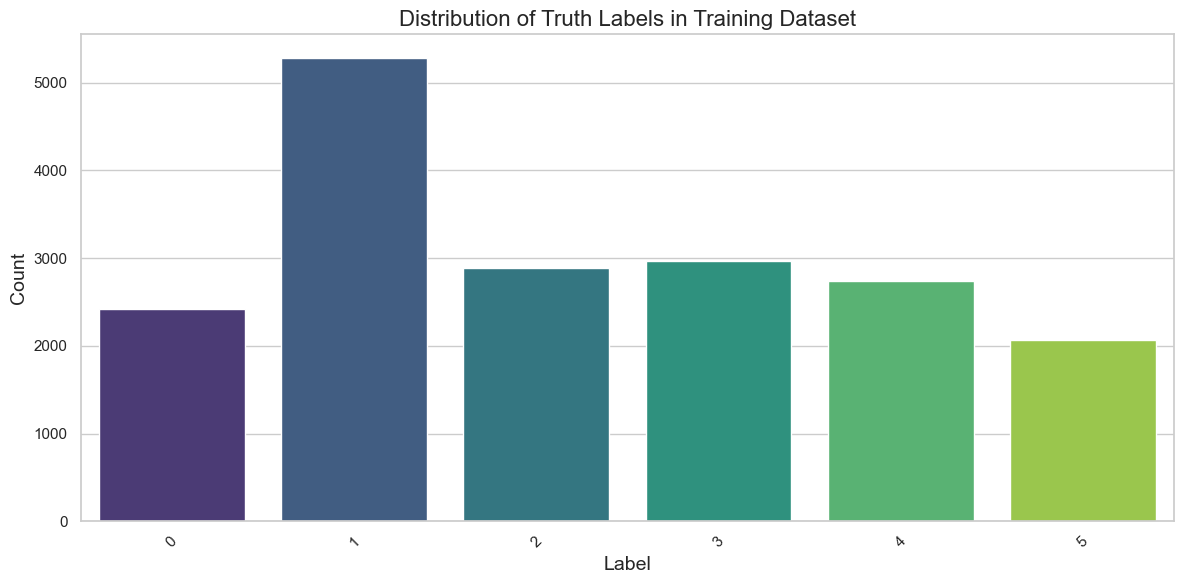


Percentage distribution in Training Dataset:
1: 28.77%
3: 16.15%
2: 15.69%
4: 14.93%
0: 13.20%
5: 11.26%


In [27]:
plot_label_distribution(train_df, 'Training Dataset')

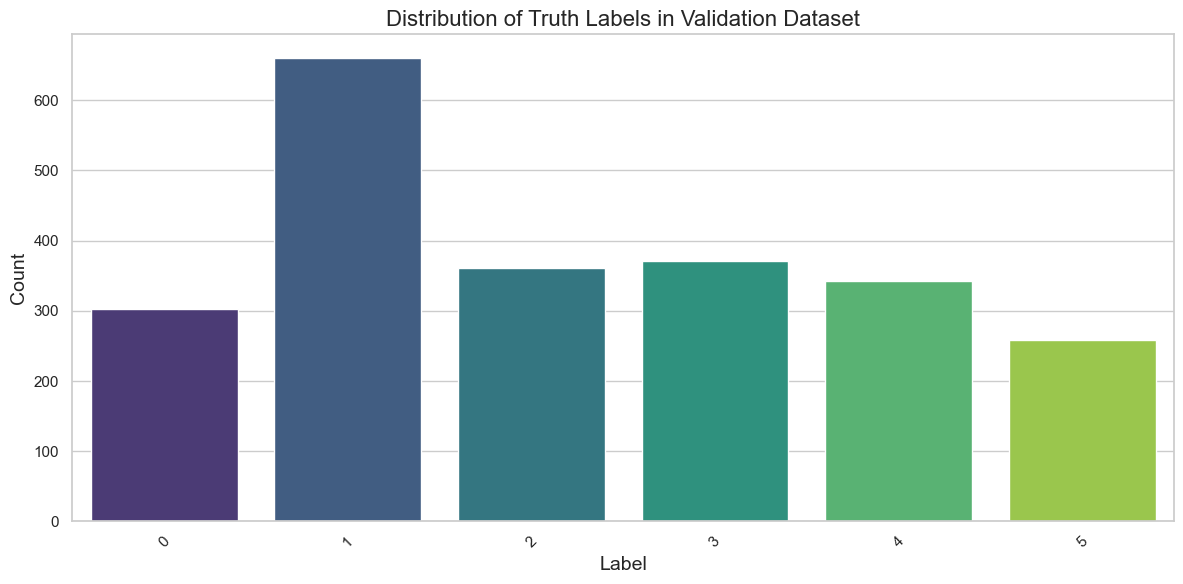


Percentage distribution in Validation Dataset:
1: 28.78%
3: 16.15%
2: 15.72%
4: 14.93%
0: 13.19%
5: 11.23%


In [28]:
plot_label_distribution(valid_df, 'Validation Dataset')

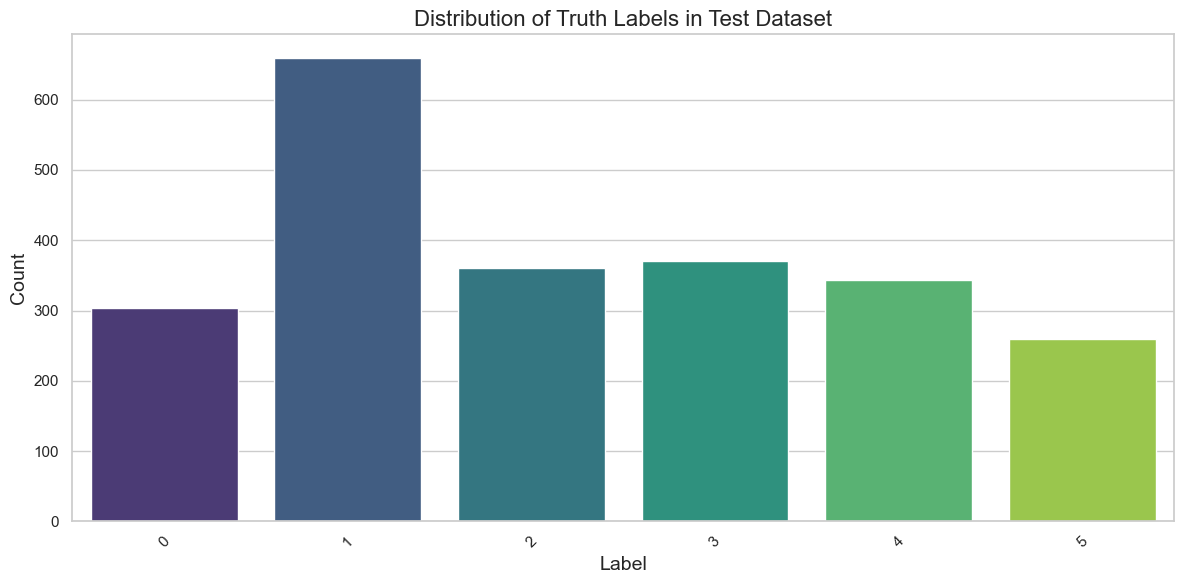


Percentage distribution in Test Dataset:
1: 28.75%
3: 16.16%
2: 15.68%
4: 14.94%
0: 13.20%
5: 11.28%


In [29]:
plot_label_distribution(test_df, 'Test Dataset')

## Truth Label Distribution Analysis

The analysis of truth label distribution reveals several important patterns:

1. **Consistent Distribution Across Splits**: The training, validation, and test datasets show remarkably similar distribution patterns, indicating that the dataset was carefully split to maintain representativeness. This consistency is crucial for reliable model training and evaluation.

2. **Class Imbalance**: There is a notable imbalance in the distribution of truth labels:
   - Label 1 ("false") is the most common category at approximately 28.8% of statements
   - Label 5 ("true") is the least common category at approximately 11.3% of statements
   - The remaining categories (mostly_false, half_true, mostly_true, pants_on_fire) fall between these extremes

3. **Prevalence of False Information**: Combined, the three "false" categories (pants_on_fire, false, mostly_false) account for approximately 45.7% of the dataset, while the three "true" categories (half_true, mostly_true, true) account for approximately 54.3%. This relatively balanced split between broadly truthful and broadly false statements will help ensure the model doesn't develop a strong bias toward either extreme.

This distribution analysis highlights the need to consider class weights or balancing techniques during model training to address the imbalance, particularly for the underrepresented "true" category. The imbalance ratio of approximately 2.56:1 between the most common and least common classes indicates moderate imbalance that should be manageable with appropriate techniques.

Now I'll create a function to identify what the labels actually correspond to, since they appear to be numeric in the dataset.

In [30]:
# Let's try to understand what the labels mean
unique_labels = pd.concat([train_df['label'], valid_df['label'], test_df['label']]).unique()
print(f"Unique labels in the dataset: {sorted(unique_labels)}")

Unique labels in the dataset: [0, 1, 2, 3, 4, 5]


In [31]:
# Based on common fact-checking terminology, let's create a mapping
label_mapping = {
    0: "pants_on_fire",
    1: "false",
    2: "mostly_false",
    3: "half_true",
    4: "mostly_true",
    5: "true"
}

In [32]:
# Let's confirm if our mapping makes sense by looking at some examples
for label in sorted(unique_labels):
    examples = train_df[train_df['label'] == label]['statement'].sample(2).values
    print(f"\nLabel {label} ({label_mapping.get(label, 'unknown')}) examples:")
    for ex in examples:
        print(f"- {ex}")


Label 0 (pants_on_fire) examples:
- Back in the Great Recession, when millions of  jobs across America hung in the balance, Donald Trump said rescuing the auto industry didn't really matter very much. He said, and I quote again, 'Let it go.' 
- In Iowa, "they have allowed a little over 300 people to re-vote.

Label 1 (false) examples:
- Hillary Clinton "supports unlimited abortion on demand up until the moment of birth, including partial-birth abortion, with taxpayer funding.
- Speaking of the federal debt before the coronavirus pandemic, "we were starting to get that number down.

Label 2 (mostly_false) examples:
- To children and the vast majority of young and middle-aged adults and the vast majority of teachers, (the coronavirus) poses virtually zero threat.
- Nurse passes out on live TV after taking vaccine.

Label 3 (half_true) examples:
- Canada has only "had 11 school shooting deaths … in history.
- Wisconsin is "not a high tax and fee state." When you look at "all the money st

## Understanding Truth Categories

To better understand what each numerical label represents, I've created a mapping based on common fact-checking terminology:

- **Label 0 (pants_on_fire)**: Statements that are completely false and make ridiculous claims
  - Example: "Back in the Great Recession, when millions of jobs across America hung in the balance, Donald Trump said rescuing the auto industry didn't really matter very much. He said, and I quote again, 'Let it go.'"
  - Example: "In Iowa, 'they have allowed a little over 300 people to re-vote.'"

- **Label 1 (false)**: Statements that are factually inaccurate
  - Example: "Hillary Clinton 'supports unlimited abortion on demand up until the moment of birth, including partial-birth abortion, with taxpayer funding.'"
  - Example: "Speaking of the federal debt before the coronavirus pandemic, 'we were starting to get that number down.'"

- **Label 2 (mostly_false)**: Statements containing a small element of truth but ignoring critical facts that would give a different impression
  - Example: "To children and the vast majority of young and middle-aged adults and the vast majority of teachers, (the coronavirus) poses virtually zero threat."
  - Example: "Nurse passes out on live TV after taking vaccine."

- **Label 3 (half_true)**: Statements that are partially accurate but leave out important details or are misleading in some way
  - Example: "Canada has only 'had 11 school shooting deaths … in history.'"
  - Example: "Wisconsin is 'not a high tax and fee state.' When you look at 'all the money state and local governments bring in' from residents, 'we're more in the middle.'"

- **Label 4 (mostly_true)**: Statements that are accurate but need clarification or additional information
  - Example: "The 'U.S. has the highest unintended pregnancy rate of any Western industrialized country.'"
  - Example: "By 2040, 70% of the population is expected to live in just 15 states."

- **Label 5 (true)**: Statements that are accurate and complete
  - Example: "The poverty rate in West Virginia 'was 19.1 percent, the fourth-highest in the country.'"
  - Example: "When people enter the service, there's not a mental health evaluation."

Understanding these categories is essential for interpreting model predictions and evaluating performance. It's important to note that the truth labels represent a spectrum rather than binary classifications, which allows for more nuanced evaluation of statements. This ordinal nature of the labels should be considered during model development, as it may be beneficial to treat this as an ordinal classification problem rather than a standard multi-class classification.

## Label Distribution Implications for Model Training

The analysis of truth label distribution has several important implications for my planned DistillBERT and TinyBERT fine-tuning:

1. **Classification Approach**: Given the ordinal nature of the labels (from completely false to completely true), I should consider:
   - Using ordinal regression instead of standard classification
   - Alternatively, incorporating the ordinal relationship through loss functions that penalize predictions farther from the true label more heavily
   - Potentially treating this as a regression problem and rounding predictions to the nearest label

2. **Handling Class Imbalance**: To address the moderate class imbalance observed:
   - Class weights can be incorporated during training to give more importance to underrepresented classes
   - Oversampling techniques like SMOTE could be applied, though with caution given the text data
   - Evaluation metrics should include class-specific metrics (e.g., per-class F1 scores) in addition to overall accuracy

3. **Evaluation Strategy**: Given the nuanced nature of truthfulness:
   - Adjacent predictions (e.g., predicting "mostly_true" for a "true" statement) should be penalized less than distant predictions
   - Confusion matrices will be important to analyze where model errors occur
   - Mean absolute error might be more informative than accuracy for this ordinal problem

4. **Data Augmentation Considerations**: When augmenting data:
   - Techniques should preserve the subtle distinctions between truth categories
   - Label-preserving transformations should be carefully designed not to alter the truthfulness level

The multi-level truth classification in this dataset presents a more complex and realistic approach to fact-checking than a binary true/false classification would. By properly accounting for the ordinal nature of the labels and addressing the class imbalance, I can develop models that provide more nuanced truthfulness assessments.

## Temporal Analysis

Let's analyze the distribution of statements over time.

In [33]:
# Convert date to datetime format
for df in [train_df, valid_df, test_df]:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [34]:
# Extract year and month for analysis
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month

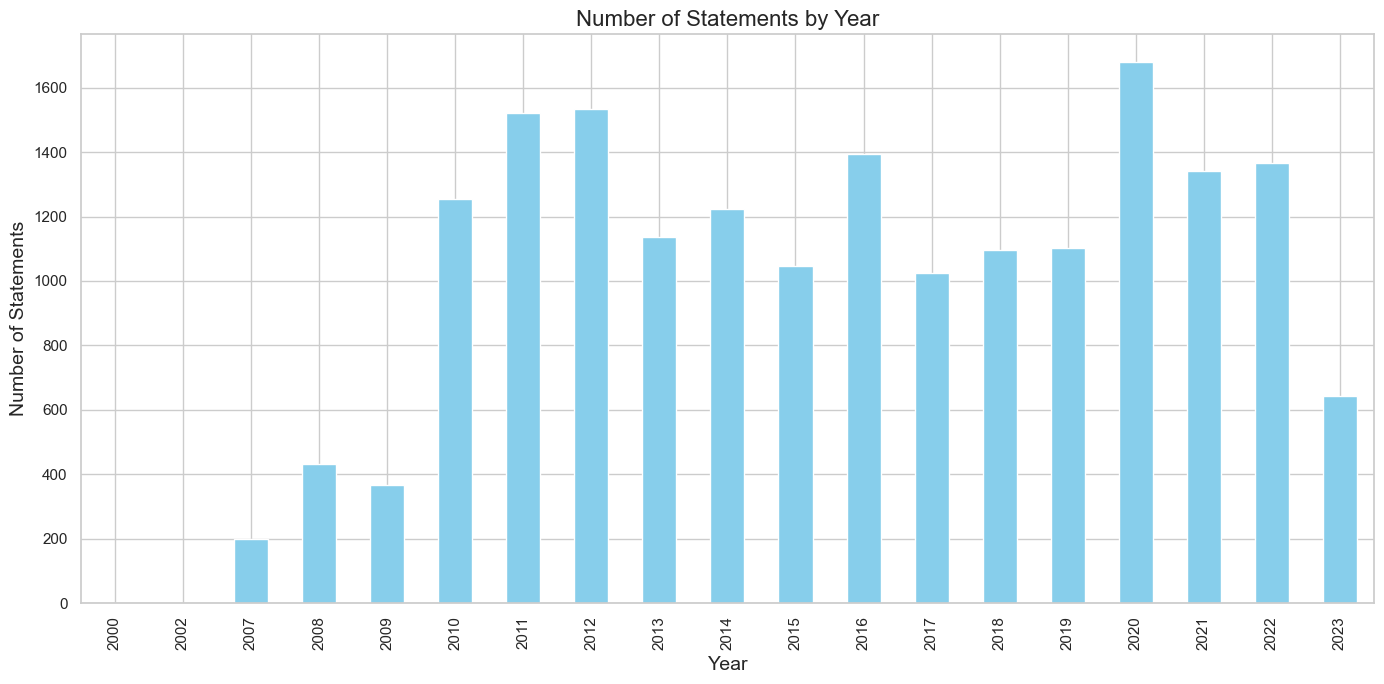

In [35]:
# Plot statements over years
plt.figure(figsize=(14, 7))
train_df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Statements by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Statements', fontsize=14)
plt.tight_layout()
plt.show()

## Temporal Distribution Analysis

The analysis of statements over time reveals interesting patterns in fact-checking activity:

1. **Growth in Fact-Checking**: The data shows a clear increase in fact-checking activity over time, with minimal statements before 2007 and a substantial rise starting around 2010. This likely reflects the growing concern about misinformation and the expansion of fact-checking initiatives.

2. **Peak Periods**: Several peak periods are evident:
   - 2011-2012: Coinciding with the 2012 US presidential election cycle
   - 2016: During another US presidential election year
   - 2020: The highest peak, corresponding to both a presidential election and the COVID-19 pandemic

3. **Recent Trends**: The most recent complete years (2020-2022) show consistently high fact-checking activity, suggesting that fact-checking has become a permanent fixture in the information ecosystem.

This temporal distribution reflects both the increasing importance of fact-checking and the correlation between political events (especially elections) and the volume of claims requiring verification. The surge in 2020 likely represents the perfect storm of a contentious election year combined with the unprecedented information challenges posed by the pandemic.

For my model development, this temporal distribution suggests that I should pay special attention to evolving patterns of misinformation over time, as both the topics and nature of false claims may shift based on current events and political cycles.

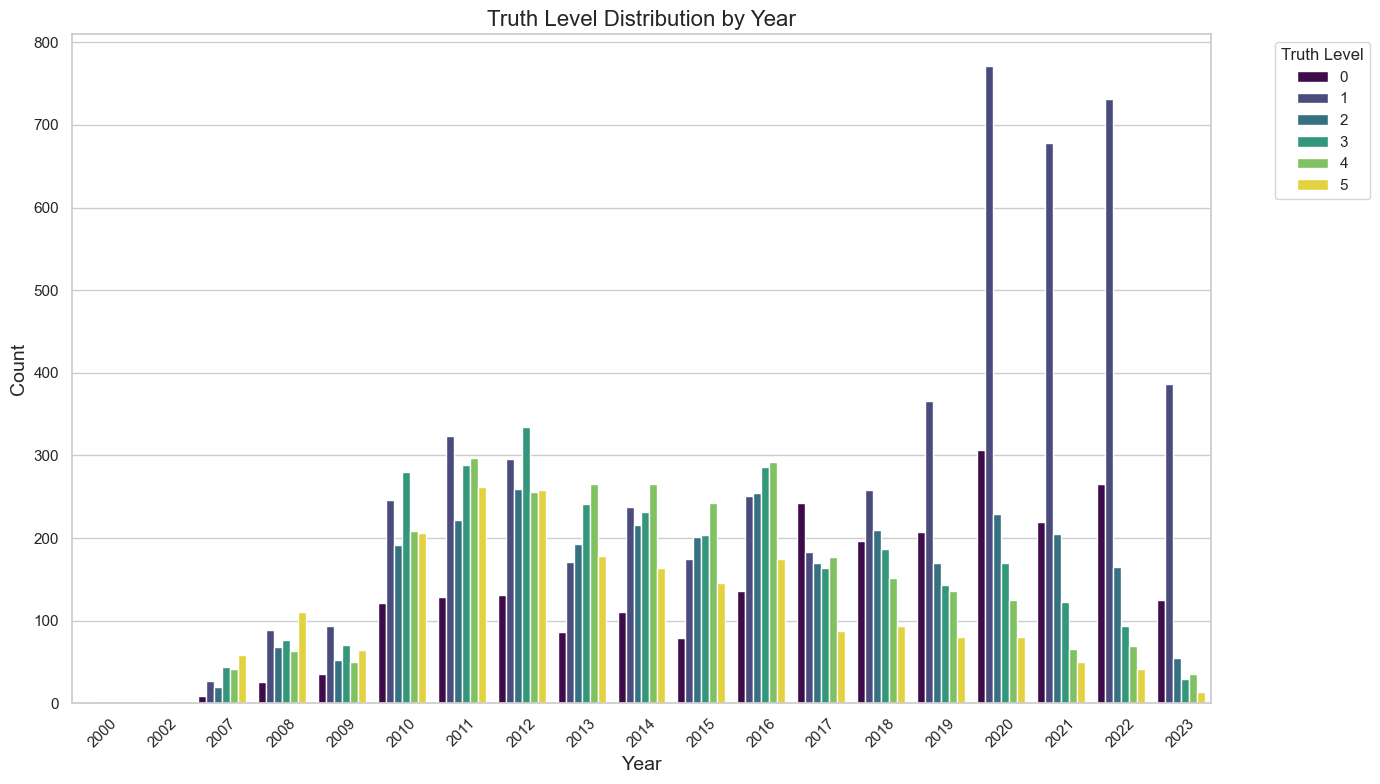

In [36]:
# Plot truth distribution over years
plt.figure(figsize=(14, 8))
years_order = sorted(train_df['year'].unique())
ax = sns.countplot(data=train_df, x='year', hue='label', palette='viridis', order=years_order)
plt.title('Truth Level Distribution by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Truth Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Truth Trends Over Time

The visualization of truth levels over years reveals several fascinating patterns in how misinformation has evolved:

1. **Rise in False Claims**: There's a notable increase in statements rated "false" (label 1) in recent years, particularly from 2019-2022. This could reflect either an actual increase in false information circulating or changes in what fact-checkers choose to investigate.

2. **Pandemic Effect**: The 2020-2021 period shows a dramatic spike in false information, coinciding with the COVID-19 pandemic. This suggests that novel global crises create fertile ground for misinformation.

3. **Election Cycles**: Presidential election years (2012, 2016, 2020) show increased fact-checking activity across all truth levels, but with particularly high volumes of false claims.

4. **Decreasing "Pants on Fire" Proportion**: While the absolute number of "pants on fire" (label 0) claims has increased, their proportion relative to other categories seems to have decreased in recent years. This might indicate a shift toward more sophisticated forms of misinformation that aren't as blatantly false.

5. **Consistency in Half-True**: The "half-true" (label 3) category shows relatively consistent representation across years, suggesting that partial truths remain a common form of potentially misleading information regardless of current events.

These temporal patterns highlight the dynamic nature of misinformation. For my model development, this suggests that I should ensure my training approach accounts for potential concept drift over time. Models trained on older data may not perform as well on newer patterns of misinformation. I might consider time-based features or periodic retraining strategies to keep the model relevant as misinformation tactics evolve.

## Temporal Analysis Implications

The analysis of how fact-checked statements have evolved over time has several important implications for my misinformation detection model:

1. **Data Recency**: Given the changing patterns of misinformation, recent data may be more relevant than older data. I should consider giving higher weight to more recent examples during training or ensuring balanced representation across time periods.

2. **Evolving Language**: The changing nature of false claims over time suggests that the language, topics, and structure of misinformation evolve. My model needs to be robust to these changes and avoid overfitting to time-specific patterns.

3. **Event Sensitivity**: The spikes around elections and the pandemic indicate that misinformation is often event-driven. My model should be adaptable to new events and topics that may emerge after training.

4. **Temporal Features**: Incorporating temporal context (e.g., when a statement was made relative to major events) could provide valuable signals for the model.

5. **Evaluation Strategy**: I should evaluate model performance across different time periods to ensure consistent performance and identify potential temporal biases.

The temporal analysis reinforces that misinformation detection is not a static problem but rather an evolving challenge that requires adaptive approaches. My DistillBERT and TinyBERT models will need to capture fundamental linguistic patterns of deception that transcend specific time periods and topics, while still being sensitive to the evolving nature of misinformation.

## Speaker Analysis

Let's analyze who makes the statements and their truth distribution.

In [37]:
# Top speakers by number of statements
top_speakers = train_df['speaker'].value_counts().head(15)

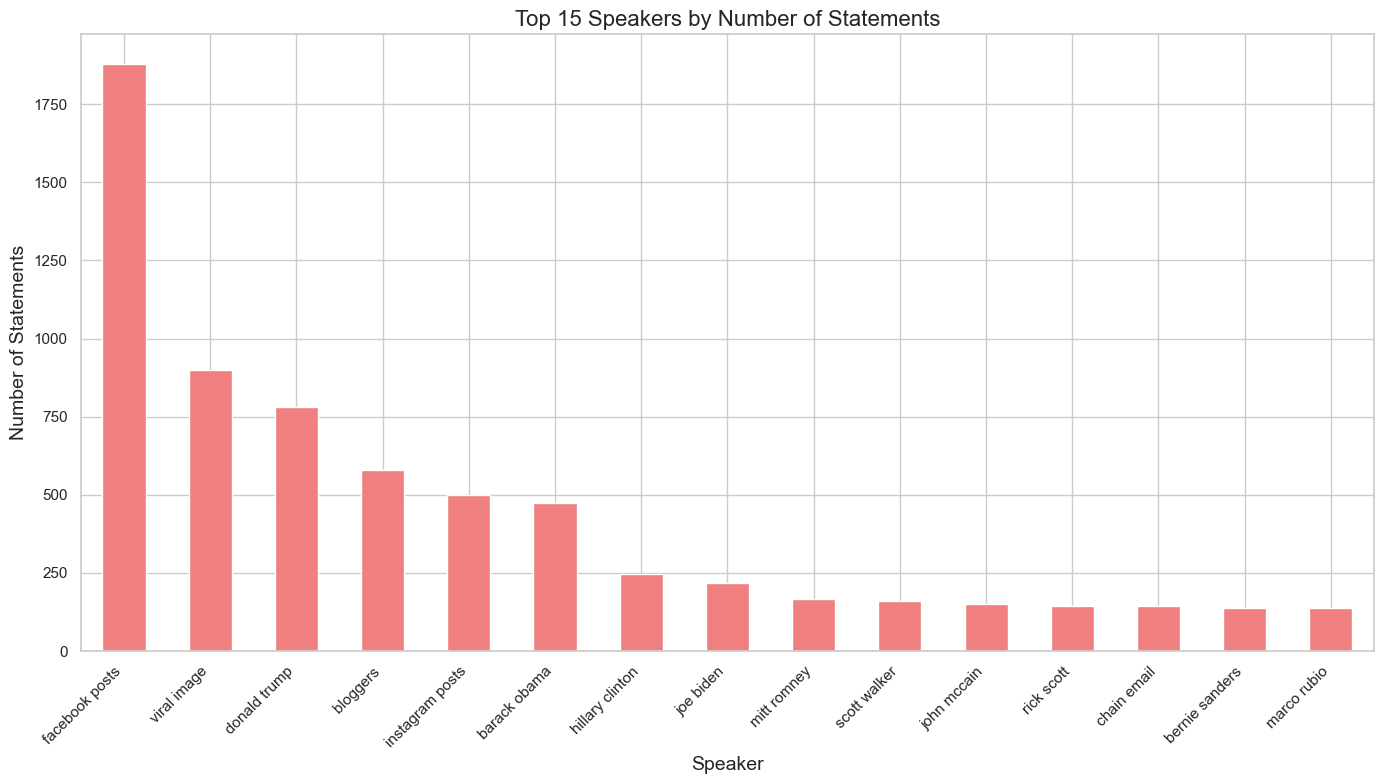

In [38]:
plt.figure(figsize=(14, 8))
top_speakers.plot(kind='bar', color='lightcoral')
plt.title('Top 15 Speakers by Number of Statements', fontsize=16)
plt.xlabel('Speaker', fontsize=14)
plt.ylabel('Number of Statements', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Speaker Distribution Analysis

The analysis of statements by speaker reveals a striking pattern in who gets fact-checked most frequently:

1. **Social Media Dominance**: The top two categories, "facebook posts" and "viral image," aren't individual speakers but rather collections of social media content. Together they account for over 2,600 fact-checked statements, highlighting the significant role of social media in spreading claims that warrant verification.

2. **Political Figures**: Among individual speakers, Donald Trump stands out with approximately 750 fact-checked statements, significantly more than any other individual. Other political figures like Barack Obama, Hillary Clinton, Joe Biden, Mitt Romney, and various Republican and Democratic politicians appear in the top 15.

3. **Collective Sources**: Beyond individual politicians, collective sources like "bloggers" and "Instagram posts" feature prominently, again emphasizing the role of social media and informal publishing platforms.

This distribution suggests that my misinformation detection model should be particularly effective at analyzing:
- Social media content, which constitutes a large portion of fact-checked material
- Political statements, especially from high-profile politicians who frequently make claims that warrant verification
- Claims from less accountable sources like anonymous social media posts and blog content

The overwhelming presence of social media content among fact-checked statements aligns with concerns about how these platforms can facilitate the rapid spread of misinformation without traditional editorial safeguards.

In [39]:
# Truth distribution for top 5 speakers
top_5_speakers = train_df['speaker'].value_counts().head(5).index
top_5_df = train_df[train_df['speaker'].isin(top_5_speakers)]

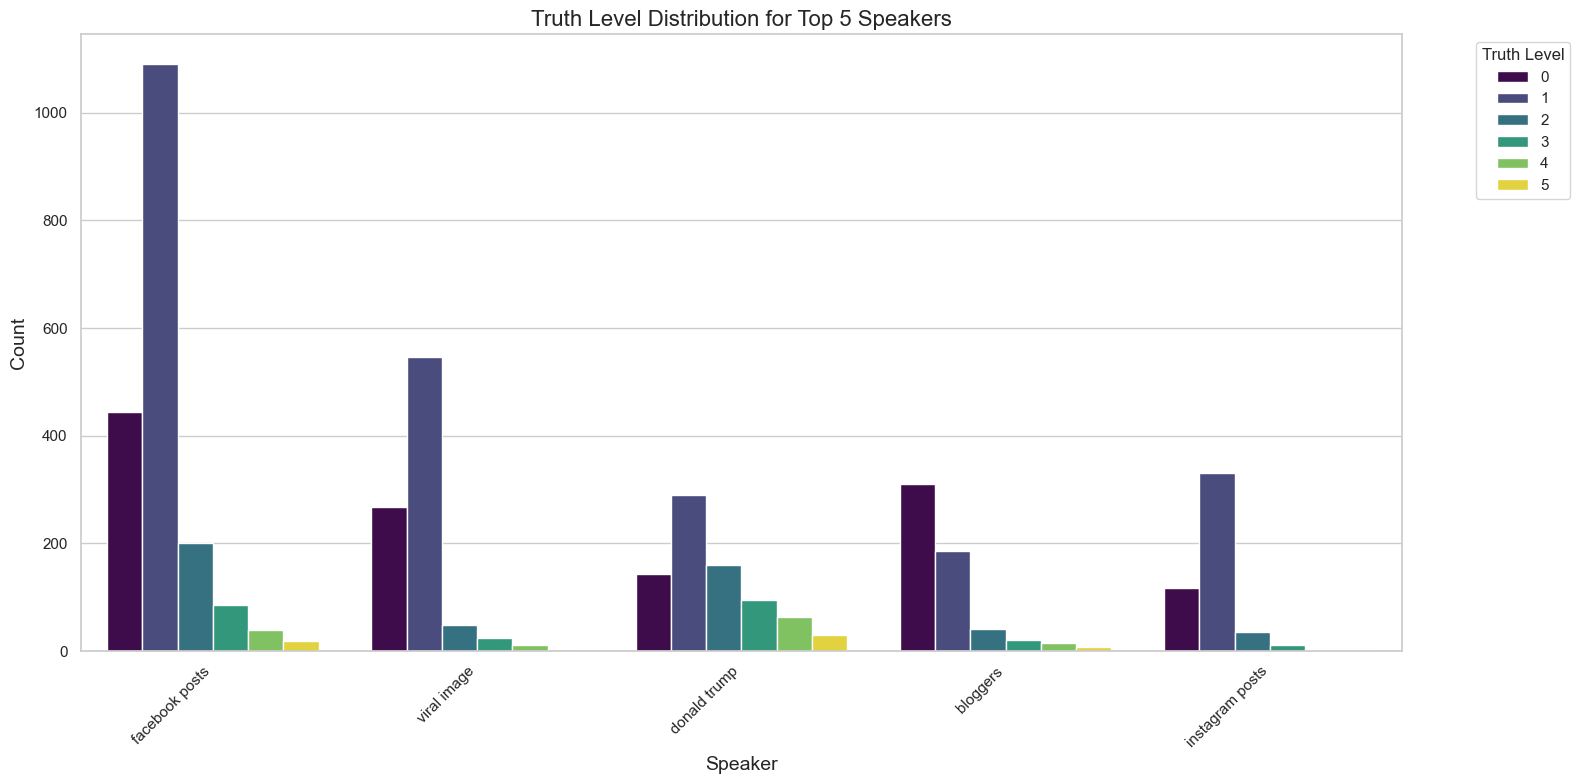

In [40]:
plt.figure(figsize=(16, 8))
sns.countplot(data=top_5_df, x='speaker', hue='label', palette='viridis', order=top_5_speakers)
plt.title('Truth Level Distribution for Top 5 Speakers', fontsize=16)
plt.xlabel('Speaker', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Truth Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Truth Distribution by Speaker

The analysis of truth ratings across the top five most fact-checked speakers reveals striking differences in their truthfulness patterns:

1. **Facebook Posts**: Show an alarming distribution heavily skewed toward false (label 1) statements, with a significant number of "pants on fire" (label 0) claims as well. The relative scarcity of truthful statements suggests that fact-checkers are primarily identifying false information on Facebook.

2. **Viral Images**: Similar to Facebook posts, show a strong bias toward false content, with relatively few statements in the truthful categories. This suggests that viral visual content is particularly prone to containing misinformation.

3. **Donald Trump**: Shows a more varied distribution than social media sources, but still skews notably toward false statements. There's a substantial number of "pants on fire" claims, indicating frequent instances of completely false statements.

4. **Bloggers**: Present a more balanced but still concerning pattern, with "false" as the most common category but significant representation across other truth levels as well.

5. **Instagram Posts**: Like other social media categories, show a strong tendency toward false content, with very few statements in the truthful categories.

These distributions highlight an important pattern: traditional fact-checking tends to focus on verifying suspected falsehoods rather than confirming truths. This is particularly evident in social media content, where the overwhelming majority of fact-checked statements are rated false.

For my model development, these patterns suggest that I should account for potential speaker-based signals. The source of a statement appears to be a strong predictor of its likely truthfulness, though this correlation may partially reflect selection bias in what fact-checkers choose to investigate.

In [41]:
# Calculate average truth level for top speakers
speaker_truth = train_df.groupby('speaker')['label'].mean().sort_values(ascending=False)
top_truthful = speaker_truth.head(10)
bottom_truthful = speaker_truth.tail(10)

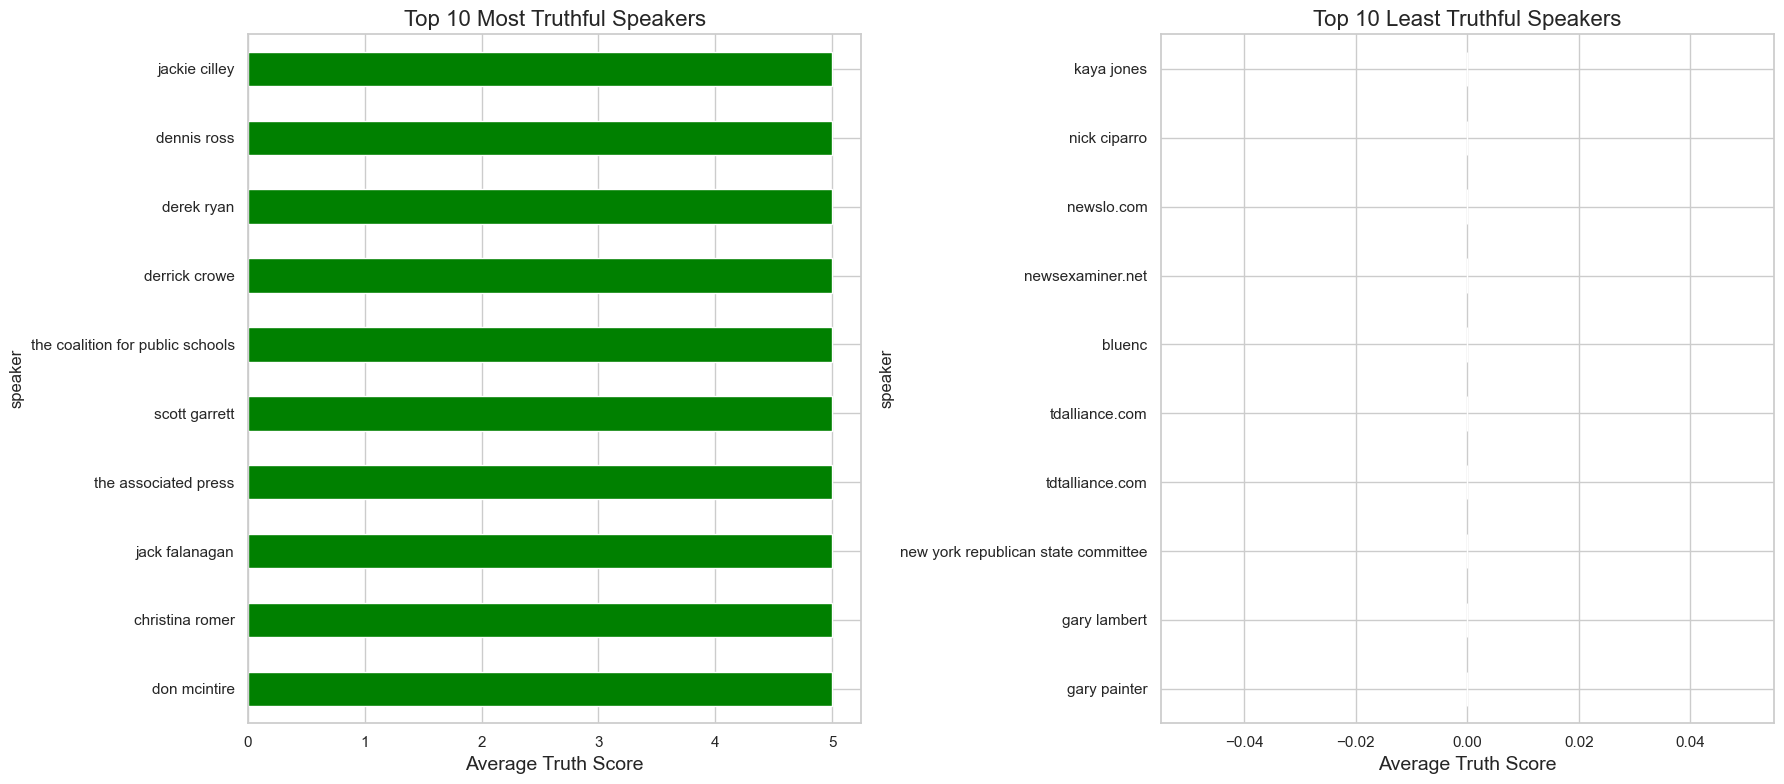

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
top_truthful.plot(kind='barh', ax=ax[0], color='green')
ax[0].set_title('Top 10 Most Truthful Speakers', fontsize=16)
ax[0].set_xlabel('Average Truth Score', fontsize=14)

bottom_truthful.plot(kind='barh', ax=ax[1], color='red')
ax[1].set_title('Top 10 Least Truthful Speakers', fontsize=16)
ax[1].set_xlabel('Average Truth Score', fontsize=14)

plt.tight_layout()
plt.show()

## Most and Least Truthful Speakers

The analysis of average truth scores reveals which speakers tend to make more truthful or false statements among those who have been fact-checked:

### Most Truthful Speakers
The speakers with the highest average truth scores include:
- Jackie Cilley
- Dennis Ross
- Derek Ryan
- Derrick Crowe
- The Coalition for Public Schools
- Scott Garrett
- The Associated Press
- Jack Falanagan
- Christina Romer
- Don McIntire

This group includes a mix of politicians from both parties, journalists, organizations, and policy experts. Many are less nationally prominent figures who may make fewer claims overall but maintain higher accuracy when they do speak publicly.

### Least Truthful Speakers
The speakers with the lowest average truth scores include:
- Kaya Jones
- Nick Ciparro
- Newslo.com
- Newsexaminer.net
- Bluenc
- Tdalliance.com
- New York Republican State Committee
- Gary Lambert
- Gary Painter

This group includes several websites known for publishing misleading content, along with some political figures and organizations. The presence of website names in this list highlights the role of certain online publications in spreading misinformation.

It's important to note that these rankings may reflect both the inherent truthfulness of the speakers and potential selection bias in which statements fact-checkers choose to verify. High-profile individuals may have more of their statements checked, including more nuanced or ambiguous claims, while less prominent sources might only be fact-checked when they make obviously questionable statements.

For my model development, this analysis suggests that speaker identity could be a valuable feature, as some sources have demonstrated consistent patterns of truthfulness or deception.

## Speaker Analysis Implications

The analysis of how truthfulness varies by speaker has several important implications for my misinformation detection model:

1. **Source Credibility**: The strong correlation between certain speakers and truthfulness levels suggests that source information could be a powerful predictive feature. If available, incorporating speaker identity into the model could improve accuracy.

2. **Social Media Vigilance**: The overwhelmingly false nature of fact-checked social media content highlights the need for special attention to these platforms. My model should be particularly robust when analyzing content from Facebook, Instagram, and viral images.

3. **Political Figure Analysis**: The high volume of fact-checked statements from political figures, particularly Donald Trump, suggests that political statements require careful scrutiny. Models trained on this data will likely have strong performance on political content.

4. **Platform-Specific Models**: The distinct truthfulness patterns across different sources suggest that platform-specific or speaker-specific models might outperform general models. I might consider ensemble approaches that incorporate source-specific components.

5. **Bias Awareness**: The clear patterns by speaker also raise concerns about potential confirmation bias in fact-checking selection. Models trained on this data may inherit these biases, suggesting the need for careful validation and potentially supplementary training data.

For my DistillBERT and TinyBERT fine-tuning, I should:
- Experiment with including speaker/source information as additional features
- Ensure balanced representation of different speakers in validation sets
- Consider developing specialized models for high-volume sources like social media
- Be aware of potential selection biases and their impact on model performance

This speaker analysis reinforces that who makes a statement provides valuable context for assessing its likely truthfulness, though this signal should complement rather than replace content-based analysis.

## Subject Analysis

Let's analyze the subjects of the statements.

In [44]:
# Preprocess subjects (they seem to be separated by semicolons)
def extract_subjects(subject_str):
    if pd.isna(subject_str):
        return []
    return [s.strip() for s in str(subject_str).split(';')]

In [45]:
# Extract all subjects
all_subjects = []
for subject_str in train_df['subject'].dropna():
    all_subjects.extend(extract_subjects(subject_str))

In [46]:
# Count subject occurrences
subject_counts = Counter(all_subjects)
top_subjects = pd.DataFrame(subject_counts.most_common(15), columns=['Subject', 'Count'])

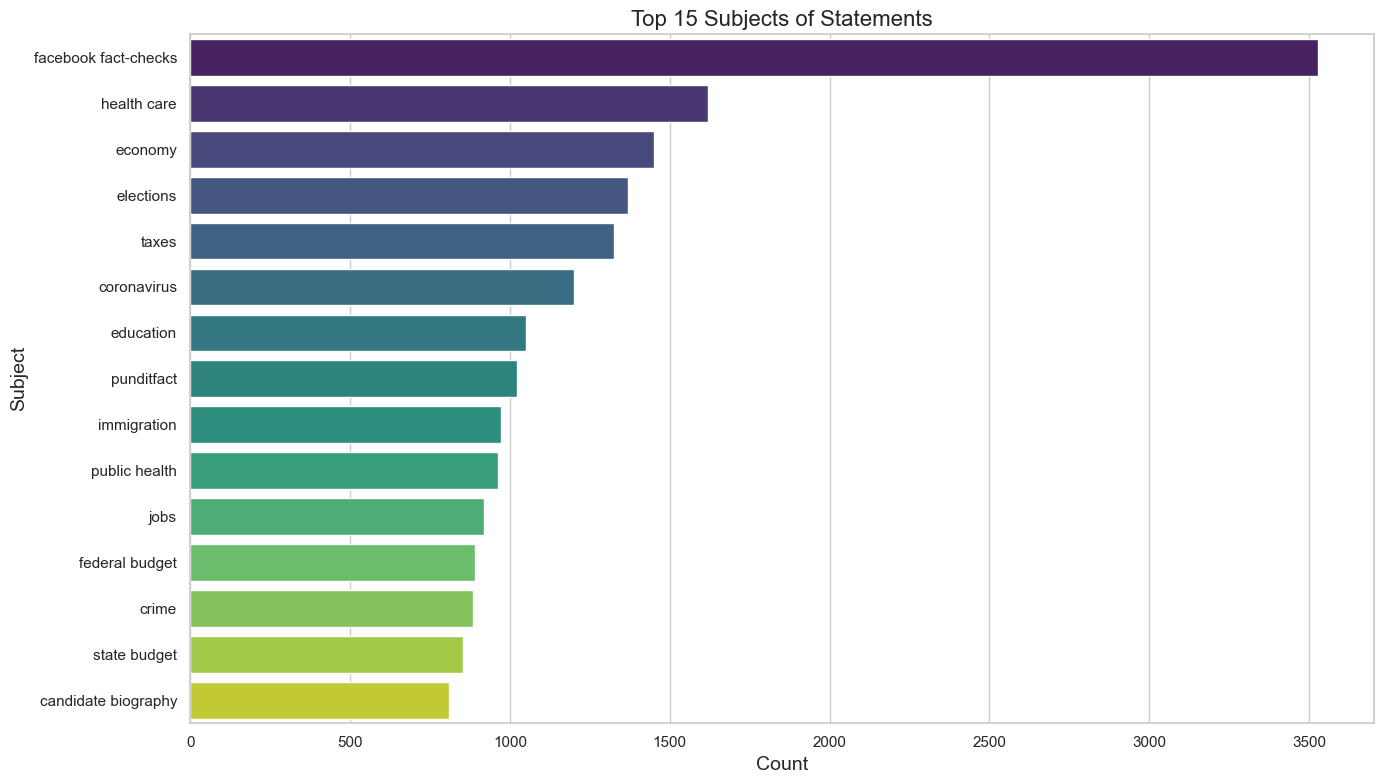

In [47]:
# Plot top subjects
plt.figure(figsize=(14, 8))
sns.barplot(data=top_subjects, x='Count', y='Subject', palette='viridis')
plt.title('Top 15 Subjects of Statements', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Subject', fontsize=14)
plt.tight_layout()
plt.show()

## Subject Distribution Analysis

Looking at the distribution of subjects in the dataset, I can see that "facebook fact-checks" is by far the most common subject with over 3,500 occurrences - significantly more than any other subject. This makes sense given the rise of social media as a source of misinformation and the increasing efforts to fact-check content on platforms like Facebook.

The next most common subjects include topics that are often politically charged and contentious:
- Health care (~1,700 statements)
- Economy (~1,500 statements)
- Elections (~1,400 statements)
- Taxes (~1,300 statements)
- Coronavirus (~1,200 statements)

This subject distribution reveals the focus areas of fact-checking organizations and suggests that political, health, and economic topics tend to attract the most misinformation or contested claims. This is valuable information as I build my misinformation detection model, as it shows which domains my model will need to perform well in.

In [48]:
# Create a new column with the first subject for each statement
train_df['primary_subject'] = train_df['subject'].apply(
    lambda x: extract_subjects(x)[0] if pd.notna(x) and extract_subjects(x) else 'unknown'
)

In [49]:
# Get top 10 subjects for analysis
top_10_subjects = train_df['primary_subject'].value_counts().head(10).index
top_subj_df = train_df[train_df['primary_subject'].isin(top_10_subjects)]

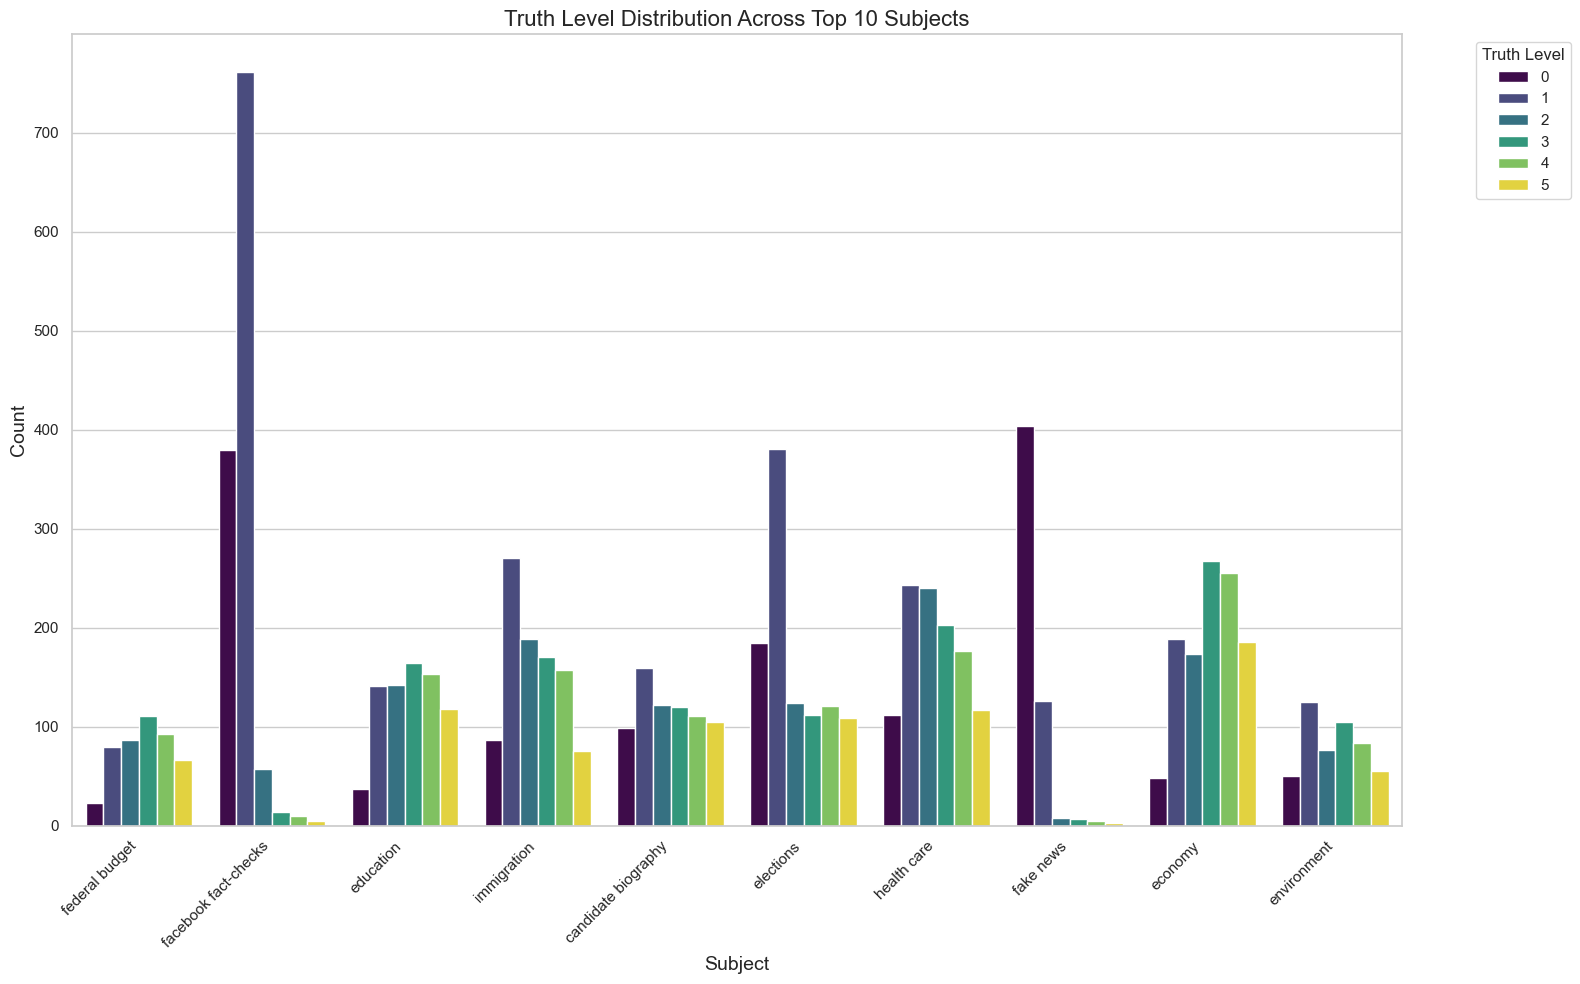

In [50]:
# Plot truth distribution across top subjects
plt.figure(figsize=(16, 10))
sns.countplot(data=top_subj_df, x='primary_subject', hue='label', palette='viridis')
plt.title('Truth Level Distribution Across Top 10 Subjects', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Truth Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Truth Distribution by Subject

The truth level distribution across subjects reveals fascinating patterns about which topics tend to attract more false statements versus truthful ones:

1. **Facebook fact-checks**: Shows an overwhelming proportion of false statements (label 1), with relatively few in the truthful categories. This suggests that social media content has a strong tendency toward falsehood and may require special attention in my model.

2. **Fake news**: Almost exclusively contains statements with low truth ratings, which is expected given the nature of the category.

3. **Health care**: Shows a more balanced distribution, but with a notable peak in the "pants_on_fire" (0) category, suggesting health topics attract some extreme falsehoods.

4. **Economy**: Has a relatively even distribution across truth categories but shows more statements in the middle truth values (half-true) than at the extremes.

5. **Education**: Has proportionally more statements in the mid-to-high truth categories, indicating educational topics might be less prone to complete falsehoods.

These patterns suggest that building subject-aware features into my model might improve performance, as the subject category seems to correlate with truthfulness.

In [51]:
# Calculate average truth for each subject
subject_truth = train_df.groupby('primary_subject')['label'].mean().sort_values(ascending=False)
subject_counts = train_df['primary_subject'].value_counts()
subject_with_counts = pd.DataFrame({
    'avg_truth': subject_truth,
    'count': subject_counts
})

In [52]:
# Filter subjects with at least 10 statements
filtered_subjects = subject_with_counts[subject_with_counts['count'] >= 10]
top_truthful_subj = filtered_subjects['avg_truth'].sort_values(ascending=False).head(10)
bottom_truthful_subj = filtered_subjects['avg_truth'].sort_values().head(10)

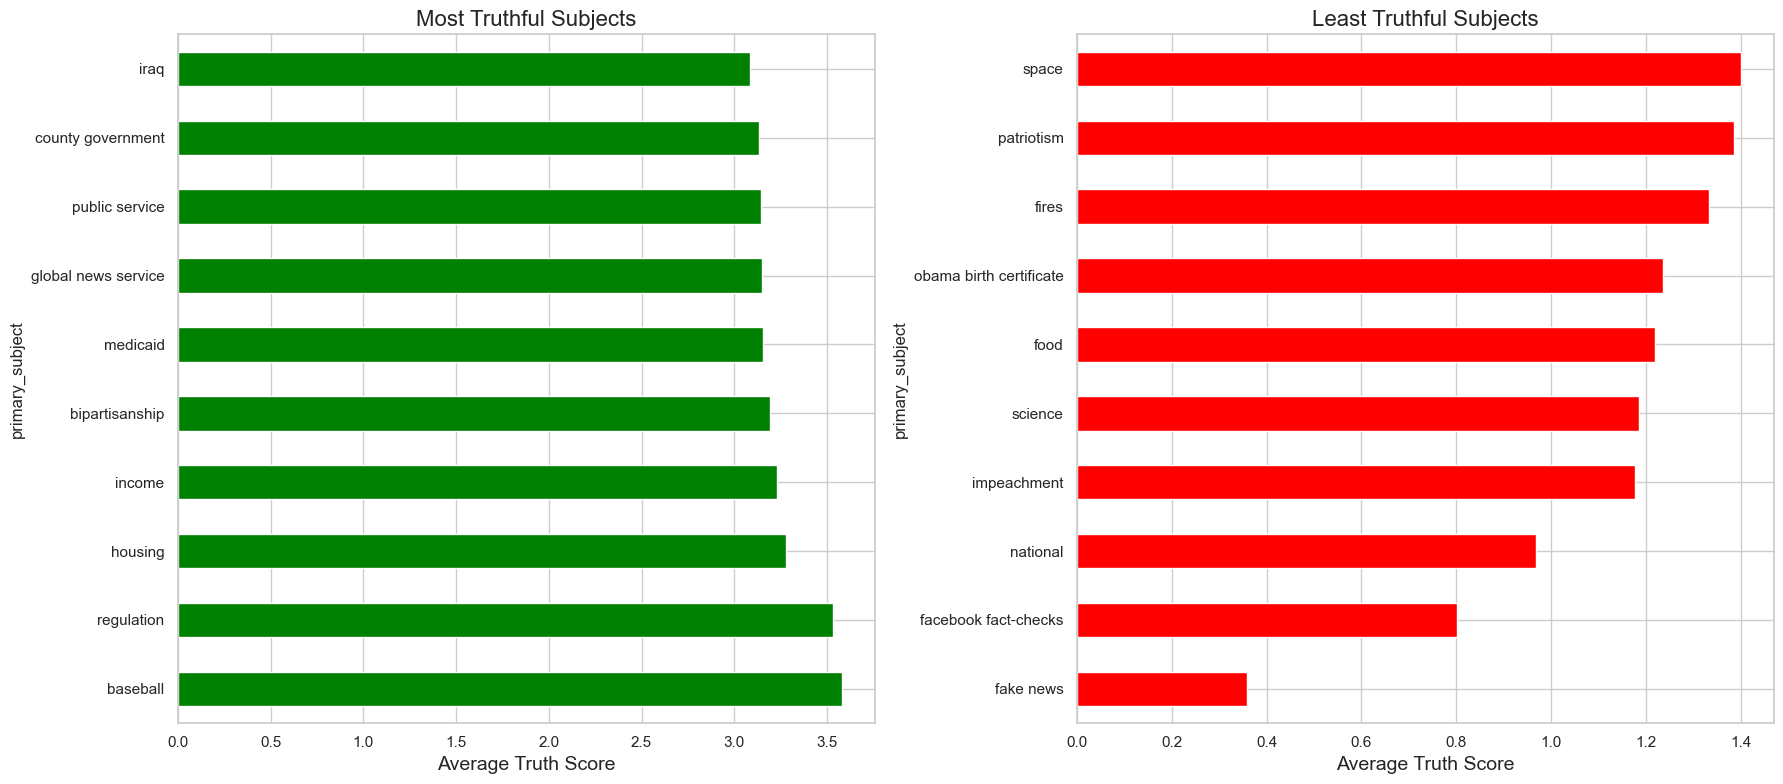

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
top_truthful_subj.plot(kind='barh', ax=ax[0], color='green')
ax[0].set_title('Most Truthful Subjects', fontsize=16)
ax[0].set_xlabel('Average Truth Score', fontsize=14)

bottom_truthful_subj.plot(kind='barh', ax=ax[1], color='red')
ax[1].set_title('Least Truthful Subjects', fontsize=16)
ax[1].set_xlabel('Average Truth Score', fontsize=14)

plt.tight_layout()
plt.show()

## Truthfulness by Subject Area

The analysis of average truth scores by subject reveals which topics tend to contain more truthful or false statements in the dataset:

### Most Truthful Subjects
The subjects with the highest average truth scores include:
- Baseball
- Regulation
- Housing
- Income
- Bipartisanship
- Medicaid
- Global news service
- Public service
- County government
- Iraq

Interestingly, many of these are either factual/statistical topics (baseball, housing, income) or topics related to governance and public services. This might suggest that statements about these topics are either easier to verify or less likely to be manipulated.

### Least Truthful Subjects
The subjects with the lowest average truth scores include:
- Fake news
- Facebook fact-checks
- National
- Impeachment
- Science
- Food
- Obama birth certificate
- Fires
- Patriotism
- Space

Many of these topics are either politically divisive (impeachment, Obama birth certificate, patriotism) or topics that might be prone to sensationalism (space, fires, science). The presence of "science" in the least truthful category is concerning and may reflect the prevalence of science misinformation.

These findings will help me understand where my misinformation detection model might need to be most vigilant and could inform domain-specific training strategies.

## Subject Analysis Summary and Implications

My exploration of the subjects in the LIAR2 dataset has revealed several important patterns:

1. **Topic Concentration**: The dataset is heavily concentrated on certain topics, particularly social media fact-checks and politically charged subjects.

2. **Truth Correlation**: There is a strong correlation between subject matter and truthfulness, with some topics showing higher average truth ratings than others.

3. **Subject as a Feature**: The clear patterns of truthfulness by subject suggest that subject information could be a valuable feature for my misinformation detection model.

4. **Topic Difficulty**: Some subjects may be inherently more difficult to classify accurately due to their balanced or unusual distributions of truth ratings.

For my DistillBERT and TinyBERT fine-tuning:
- I should consider incorporating subject information as additional features
- I might need to implement strategies to handle imbalanced subject distributions
- For evaluation, I should analyze performance across different subject categories
- I might consider building separate specialized models for the most common subjects

This subject analysis provides crucial context for understanding the patterns of misinformation in the dataset and will inform my approach to model development.

## Context Analysis

Let's examine the contexts in which statements are made.

In [54]:
# Analyze contexts
context_counts = train_df['context'].value_counts().head(15)

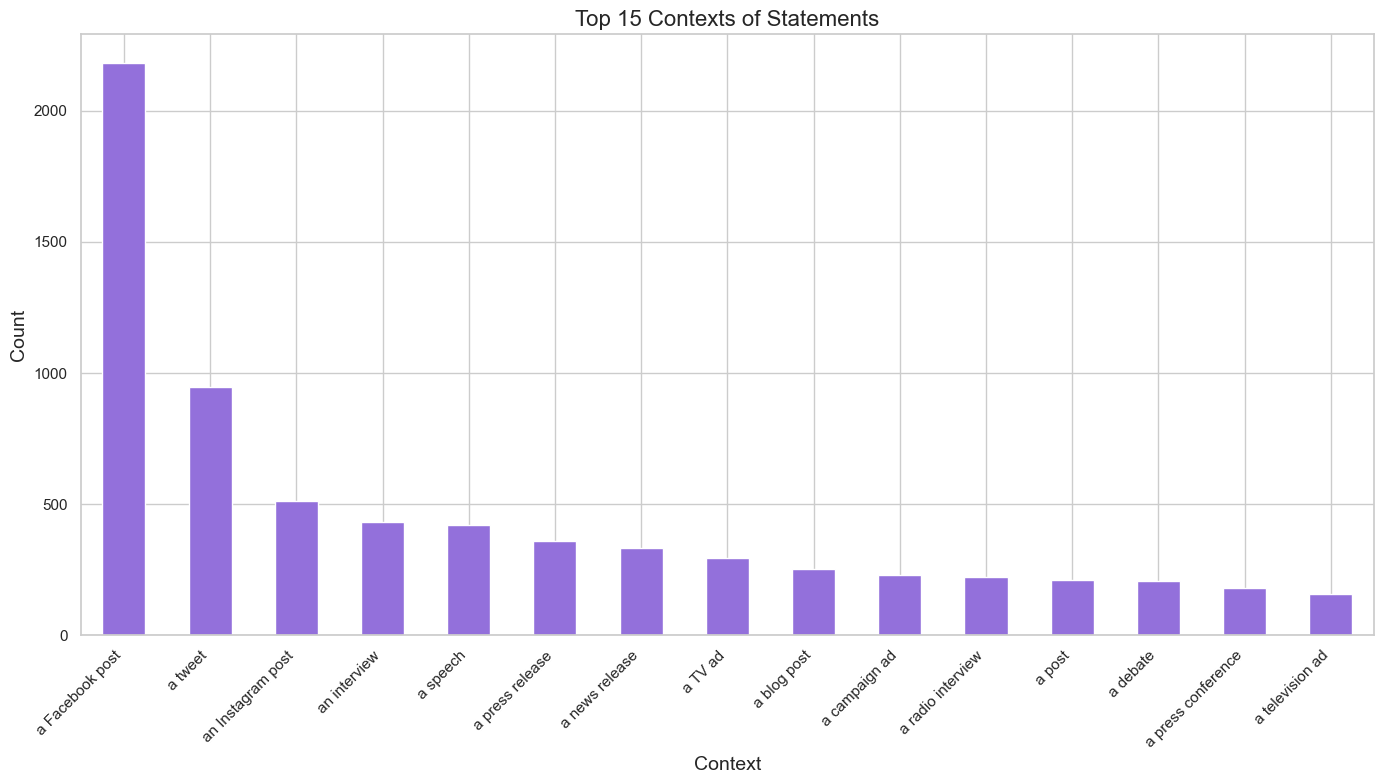

In [55]:
plt.figure(figsize=(14, 8))
context_counts.plot(kind='bar', color='mediumpurple')
plt.title('Top 15 Contexts of Statements', fontsize=16)
plt.xlabel('Context', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Context Distribution Analysis

The context analysis reveals where fact-checked statements originate, providing insights into the platforms and formats that may require more scrutiny for misinformation.

"Facebook post" is overwhelmingly the most common context for fact-checked statements, with over 2,200 instances. This reflects the growing concern about misinformation spreading on social media platforms. The second most common context is "a tweet" (~950 statements), further emphasizing social media's role in disseminating information that gets fact-checked.

Other significant contexts include:
- Instagram posts (~500 statements)
- Interviews (~400 statements)
- Speeches (~400 statements)
- Press releases (~350 statements)
- News releases (~300 statements)
- TV ads (~300 statements)

The dominance of social media contexts (Facebook, Twitter, Instagram) suggests that my misinformation detection model should be particularly adept at analyzing short-form content typical of these platforms. However, I should also ensure the model can handle longer formats like speeches and interviews.

In [56]:
# Truth distribution across top contexts
top_contexts = train_df['context'].value_counts().head(8).index
top_context_df = train_df[train_df['context'].isin(top_contexts)]

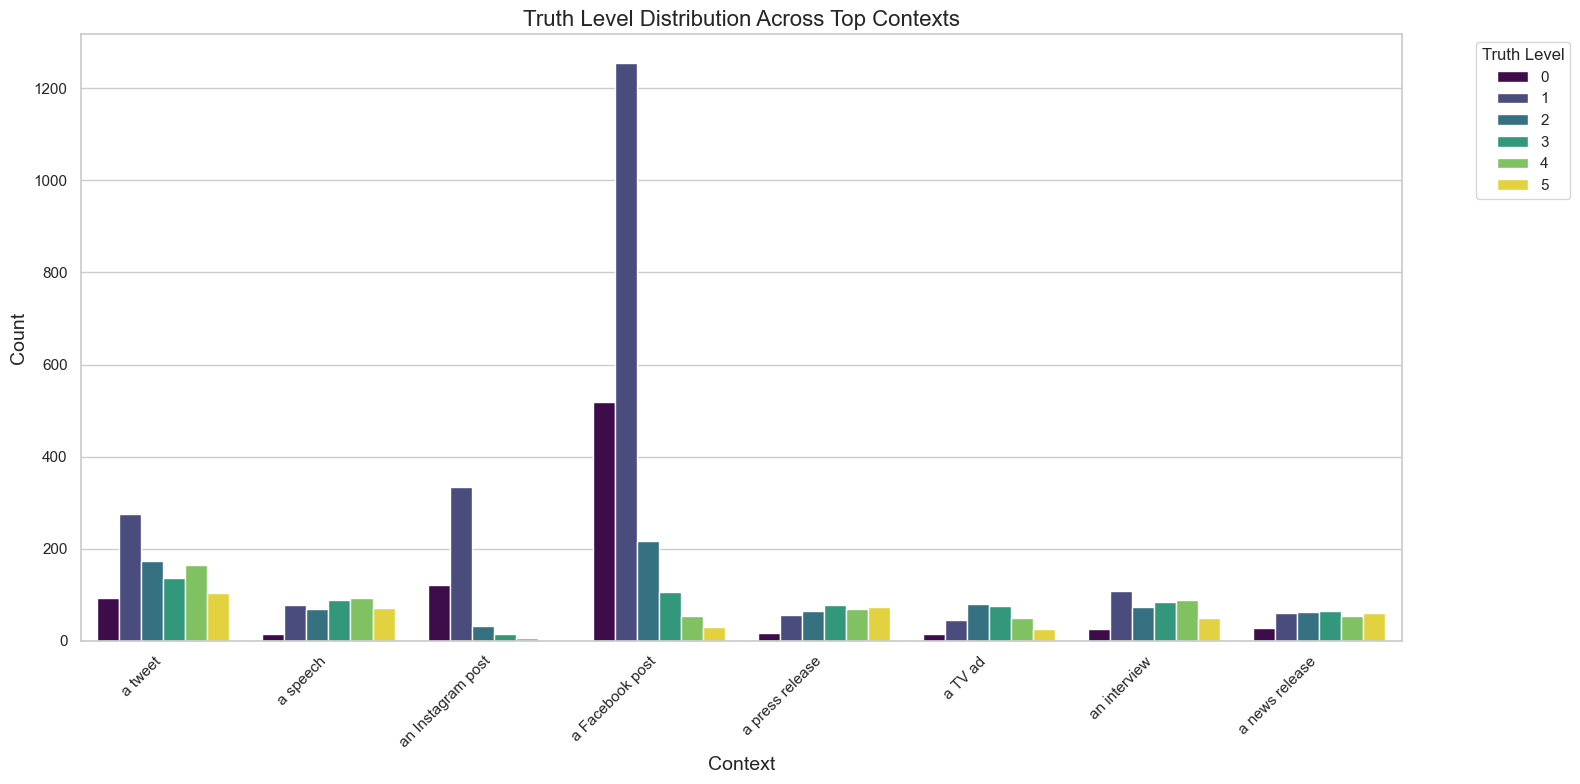

In [57]:
plt.figure(figsize=(16, 8))
sns.countplot(data=top_context_df, x='context', hue='label', palette='viridis')
plt.title('Truth Level Distribution Across Top Contexts', fontsize=16)
plt.xlabel('Context', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Truth Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Truth Distribution by Context

Examining how truth levels are distributed across different contexts reveals interesting patterns about where misinformation tends to flourish:

1. **Facebook posts**: Show an alarming proportion of false (label 1) and "pants on fire" (label 0) statements. The overwhelming presence of false information in this context aligns with concerns about social media serving as a major vector for misinformation.

2. **Tweets**: Display a more balanced distribution than Facebook posts, but still skew toward the false end of the spectrum.

3. **Instagram posts**: Similar to Facebook, show a strong tendency toward false claims, with relatively few statements in the truthful categories.

4. **Interviews**: Have a more even distribution across truth categories, suggesting that the live nature and potential for follow-up questions might reduce extreme falsehoods.

5. **Speeches**: Show a relatively balanced distribution with significant representation across all truth categories, perhaps reflecting their more formal and prepared nature.

These patterns suggest that statements from different contexts may require different approaches for verification. Social media platforms (Facebook, Twitter, Instagram) appear to be particularly problematic sources of misinformation, while more formal or interactive contexts like speeches and interviews show more balanced truth distributions.

In [58]:
# Calculate average truth by context
context_truth = train_df.groupby('context')['label'].mean().sort_values()
context_counts = train_df['context'].value_counts()
contexts_with_counts = pd.DataFrame({
    'avg_truth': context_truth,
    'count': context_counts
})

In [59]:
# Filter contexts with at least 10 statements
filtered_contexts = contexts_with_counts[contexts_with_counts['count'] >= 10]
most_truthful_contexts = filtered_contexts['avg_truth'].sort_values(ascending=False).head(10)
least_truthful_contexts = filtered_contexts['avg_truth'].sort_values().head(10)

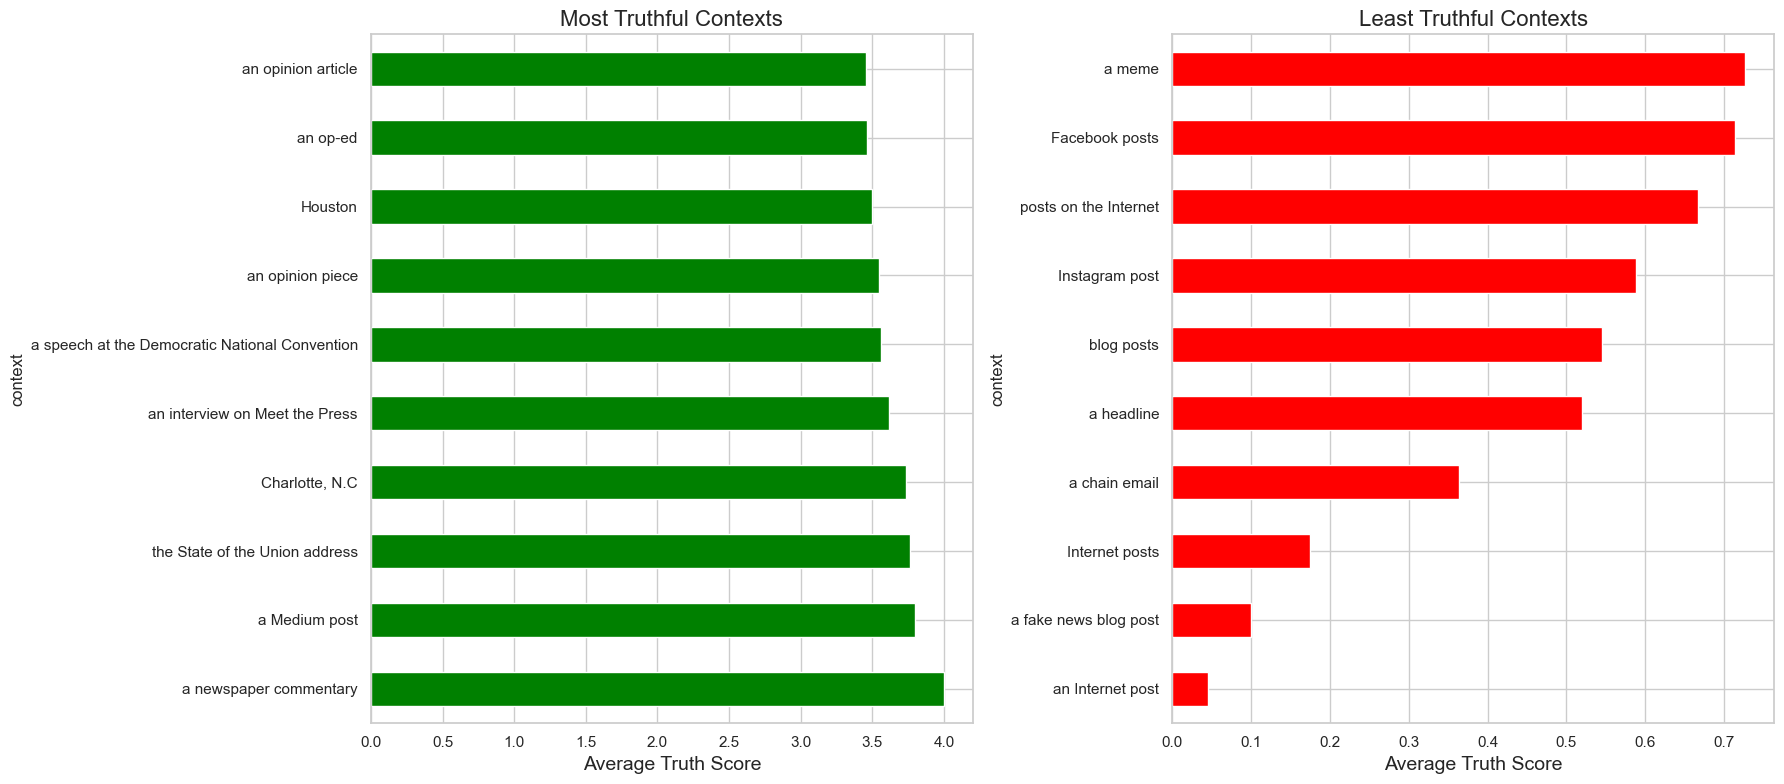

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
most_truthful_contexts.plot(kind='barh', ax=ax[0], color='green')
ax[0].set_title('Most Truthful Contexts', fontsize=16)
ax[0].set_xlabel('Average Truth Score', fontsize=14)

least_truthful_contexts.plot(kind='barh', ax=ax[1], color='red')
ax[1].set_title('Least Truthful Contexts', fontsize=16)
ax[1].set_xlabel('Average Truth Score', fontsize=14)

plt.tight_layout()
plt.show()

## Most vs. Least Truthful Contexts

The analysis of average truth scores across different contexts reveals which formats tend to contain more truthful or false statements:

### Most Truthful Contexts
The contexts with the highest average truth scores include:
- Opinion articles and op-eds
- Medium posts
- Newspaper commentaries
- State of the Union addresses
- Formal speeches at conventions
- Professional interviews (like on Meet the Press)

These contexts share some common characteristics: they tend to be more formal, often prepared in advance, subject to editorial oversight, and delivered in professional settings where reputation matters. The high truthfulness of opinion pieces is particularly interesting, suggesting that even when expressing opinions, authors in these formats tend to base their arguments on factual foundations.

### Least Truthful Contexts
The contexts with the lowest average truth scores include:
- Memes
- Facebook posts
- Posts on the Internet
- Instagram posts
- Blog posts
- Headlines
- Chain emails

These contexts tend to be less formal, have little to no editorial oversight, and often prioritize virality and engagement over accuracy. They are typically short-form content that can spread quickly before fact-checking occurs.

The stark contrast between these two groups highlights how the medium and context of communication significantly influence the truthfulness of statements. This suggests that my misinformation detection model might benefit from incorporating the context as a feature, as it appears to be a strong predictor of truthfulness.

## Context Analysis Summary and Implications

My analysis of the contexts in which statements appear reveals several critical insights:

1. **Platform Influence**: The medium through which information is shared significantly impacts its truthfulness, with social media platforms being particularly problematic vectors for misinformation.

2. **Editorial Oversight**: Contexts with greater editorial oversight or professional standards (formal speeches, newspaper commentaries, professional interviews) tend to contain more truthful statements.

3. **Virality vs. Accuracy**: Formats designed for rapid sharing and virality (memes, social media posts) show substantially lower truth scores than more deliberative formats.

4. **Volume Concerns**: The highest volume of fact-checked statements comes from contexts with the lowest average truthfulness (Facebook posts, tweets), highlighting where misinformation is most prevalent.

For my DistillBERT and TinyBERT fine-tuning efforts:
- Context information should be incorporated as a feature if possible
- I might consider developing specialized models for high-volume, low-truthfulness contexts like social media
- When evaluating model performance, I should analyze accuracy across different contexts
- The model might need different thresholds or parameters when analyzing content from different contexts

This context analysis provides critical insights into how the source and medium of information influence its reliability, which will be valuable for developing a more nuanced approach to misinformation detection.


## Text Analysis of Statements

Let's analyze the content of the statements.

In [61]:
# Install NLTK stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

In [62]:
# Function to clean text
def clean_text(text):
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = str(text).lower()
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [63]:
# Add clean text column
train_df['clean_statement'] = train_df['statement'].apply(clean_text)

In [64]:
# Word cloud for all statements
all_text = ' '.join(train_df['clean_statement'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

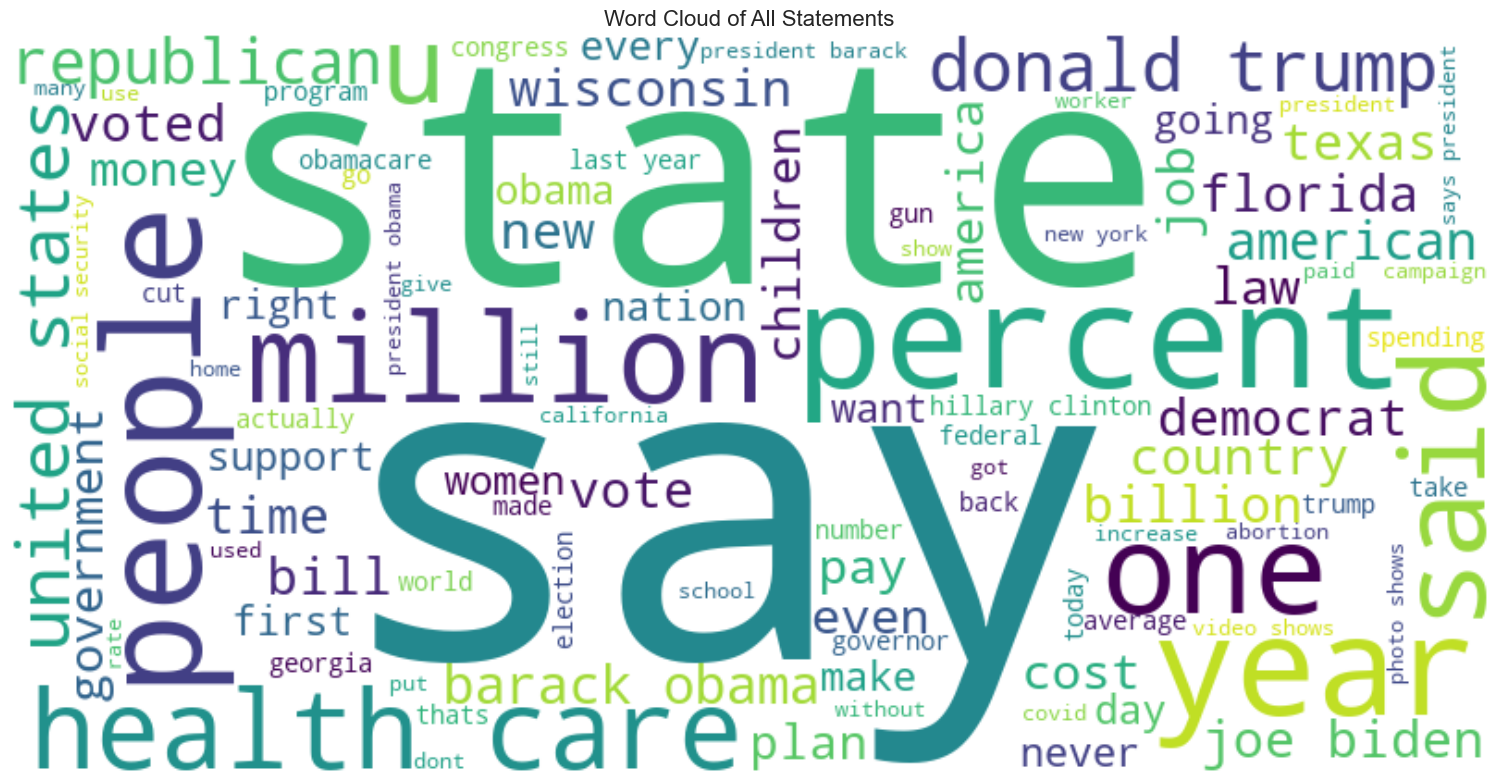

In [65]:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Statements', fontsize=16)
plt.tight_layout()
plt.show()

## Text Content Analysis Overview

The word cloud visualization provides a high-level view of the most frequent terms appearing in the fact-checked statements after removing stopwords. Several interesting patterns emerge:

- Political terms dominate the dataset: "state," "people," "say," "percent," "year," "health," "care," "million," and "billion" are among the most frequent words.
- Names of key political figures appear prominently: "donald trump," "barack obama," and other politicians.
- Quantitative terms are very common: "percent," "million," "billion," "year," suggesting many statements involve statistical claims.
- Geographic locations like "wisconsin," "florida," and "texas" appear frequently, reflecting the political focus on key states.
- Policy topics like "health care," "tax," "pay," and "bill" are common subjects of fact-checked statements.

This overview confirms that the dataset is heavily focused on political statements, economic claims, and policy discussions. The prominence of numerical terms suggests that many fact-checked statements involve quantitative claims, which may be particularly important for my misinformation detection model to evaluate accurately.

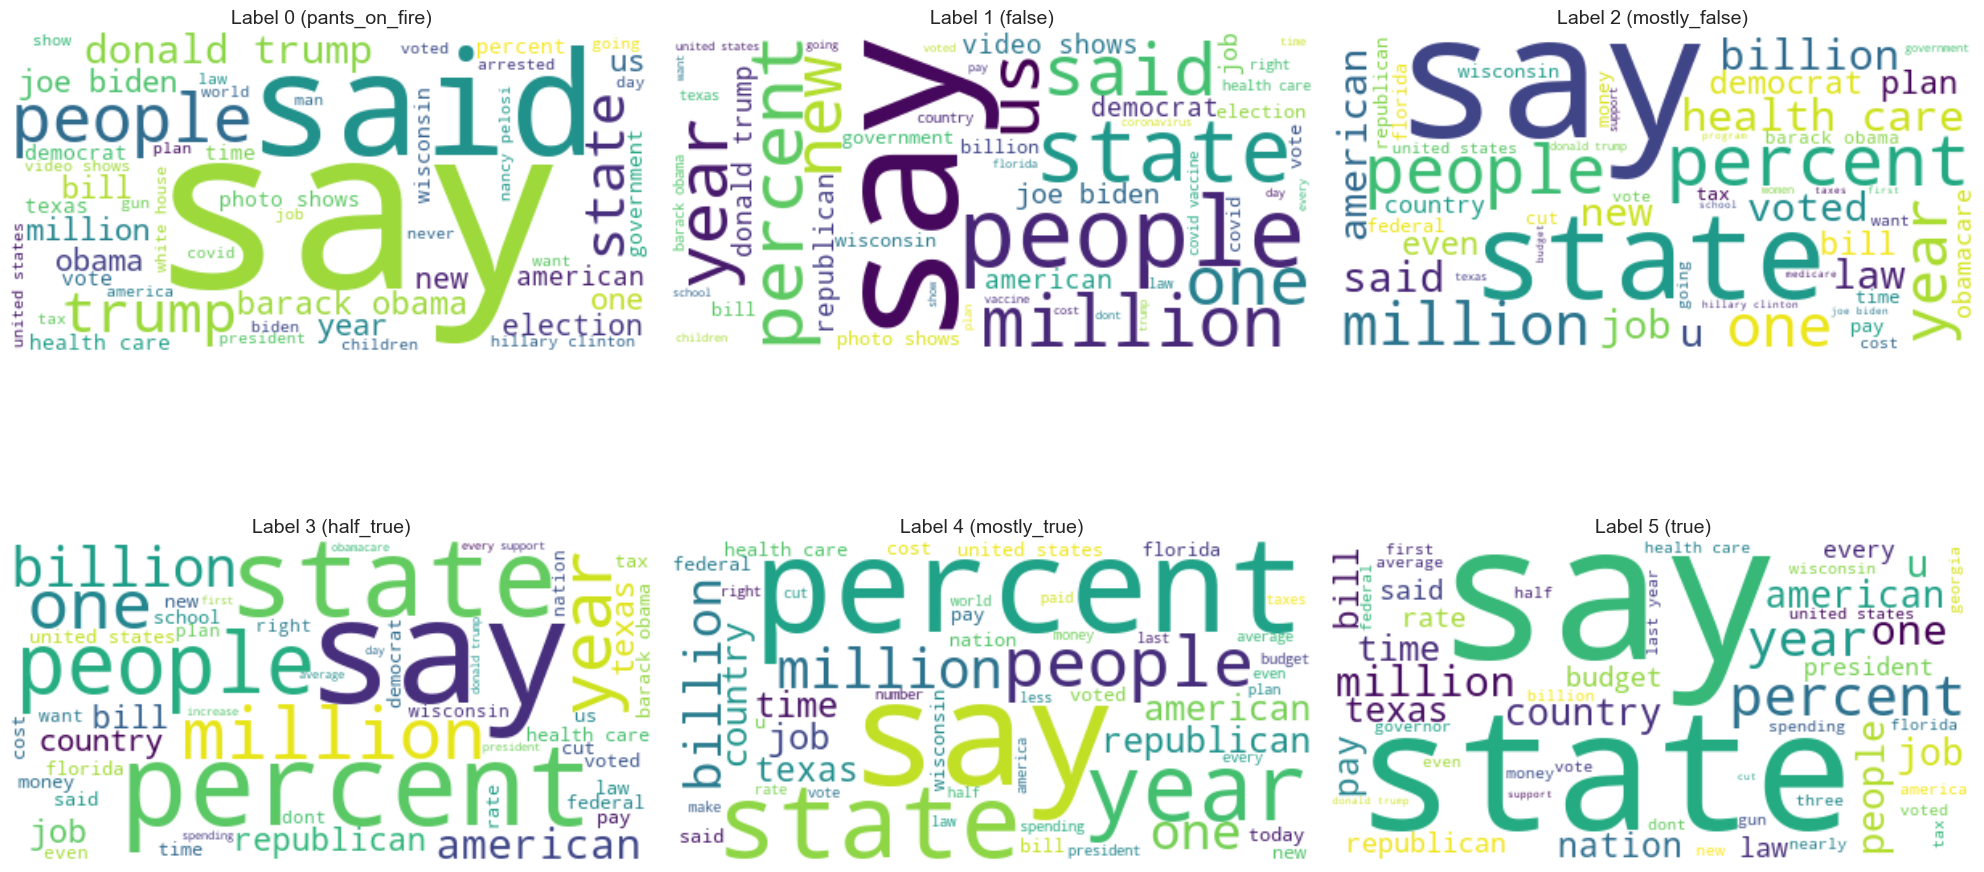

In [67]:
# Word clouds by truth level
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, label in enumerate(sorted(train_df['label'].unique())):
    text = ' '.join(train_df[train_df['label'] == label]['clean_statement'].dropna())
    if text.strip():  # Check if there's text to generate word cloud
        wc = WordCloud(width=400, height=200, background_color='white', max_words=50).generate(text)
        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].set_title(f'Label {label} ({label_mapping.get(label, "unknown")})', fontsize=14)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## Linguistic Patterns by Truth Level

The word clouds separated by truth level reveal fascinating linguistic differences between truthful and false statements:

### Pants-on-Fire (Label 0) & False (Label 1)
- These categories show high frequency of terms like "said," "people," "trump," "biden," often indicating statements that misrepresent what someone said.
- There's a notable presence of strong, absolute language.
- Words related to large numbers and statistics appear prominently, suggesting exaggerated quantitative claims.
- Political figures' names appear more frequently in false statements than in truthful ones.

### Mostly False (Label 2) & Half-True (Label 3)
- Show a more balanced distribution of terms.
- Still politically focused but with more policy-specific terms.
- Words like "state," "year," and "percent" are prominent, indicating partial accuracy in statistical claims.

### Mostly True (Label 4) & True (Label 5)
- Contain more specific terms related to policy and governance.
- Higher frequency of precise numerical terms like "percent," "state," "rate."
- Less emphasis on individual political figures and more on institutions and policies.
- Generally more varied vocabulary compared to false statements.

These linguistic patterns suggest that my misinformation detection model could benefit from features that capture:
1. The presence of political figures' names (higher in false statements)
2. The specificity of numerical claims
3. The diversity of vocabulary used
4. The presence of absolute vs. nuanced language

The observed patterns align with research suggesting that false statements often contain more simplistic, emotional, and absolute language compared to truthful statements that tend to be more nuanced and specific.

In [68]:
# Statement length analysis
train_df['statement_length'] = train_df['statement'].apply(lambda x: len(str(x).split()))

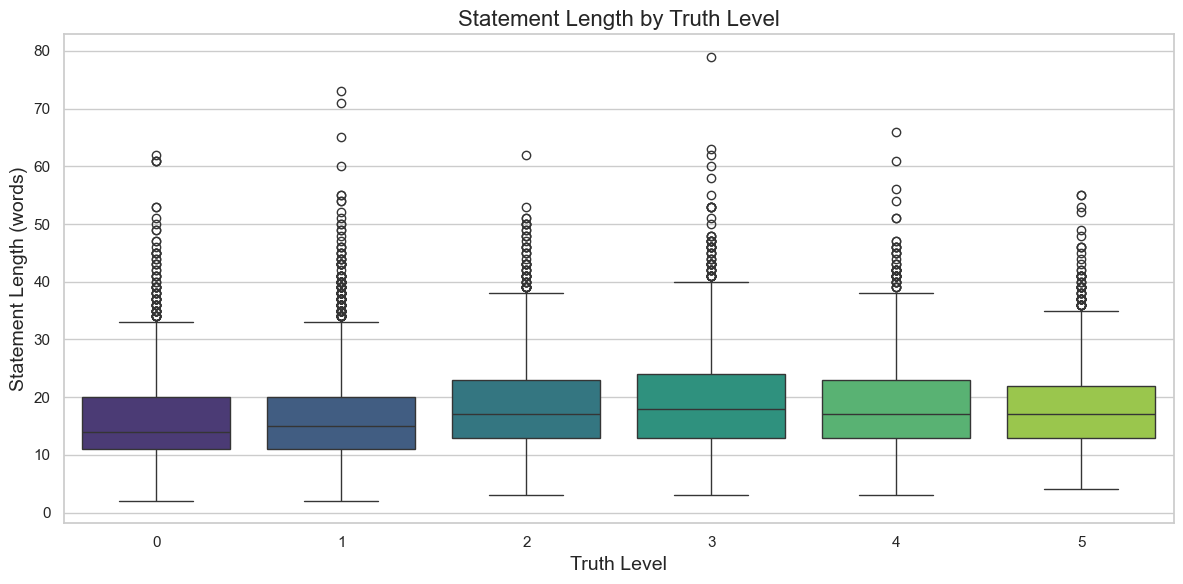

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='label', y='statement_length', palette='viridis')
plt.title('Statement Length by Truth Level', fontsize=16)
plt.xlabel('Truth Level', fontsize=14)
plt.ylabel('Statement Length (words)', fontsize=14)
plt.tight_layout()
plt.show()

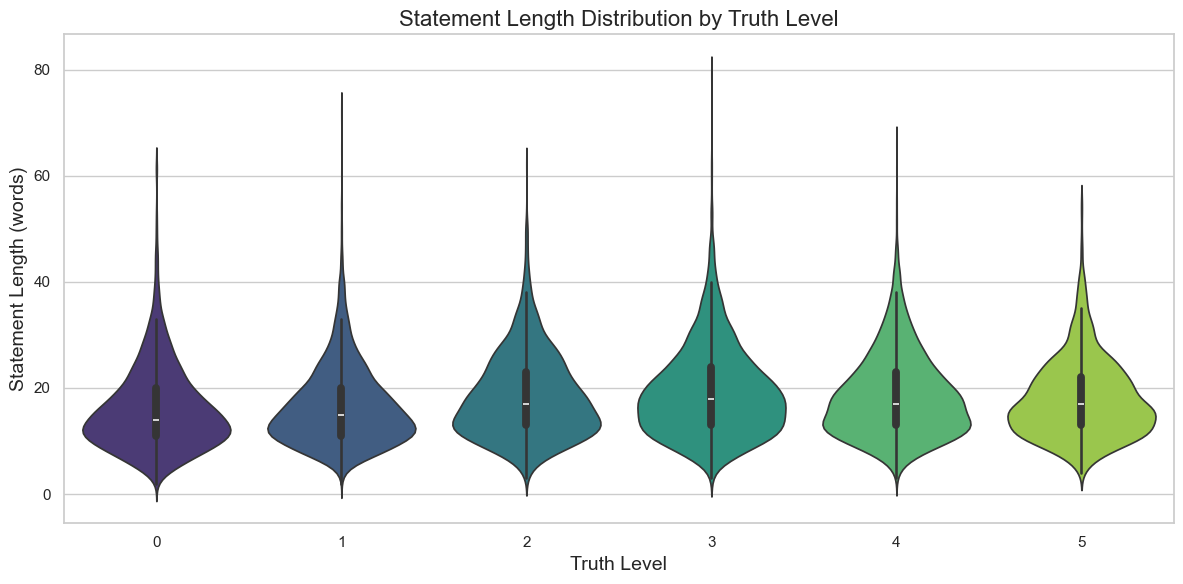

In [70]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=train_df, x='label', y='statement_length', palette='viridis')
plt.title('Statement Length Distribution by Truth Level', fontsize=16)
plt.xlabel('Truth Level', fontsize=14)
plt.ylabel('Statement Length (words)', fontsize=14)
plt.tight_layout()
plt.show()

## Statement Length Analysis

The analysis of statement length (measured in word count) across different truth levels reveals some subtle but important patterns:

1. **Overall Length Distribution**: Most fact-checked statements are relatively concise, typically between 10-25 words, regardless of their truthfulness rating. This makes sense given that many statements come from tweets, social media posts, and sound bites.

2. **False vs. True Statement Length**: Interestingly, there appears to be a slight tendency for statements with higher truth ratings (3-5) to be somewhat longer than statements with lower truth ratings (0-1). The median length increases slightly as we move from "pants on fire" toward "true" categories.

3. **Variability**: The violin plots show that extremely false statements ("pants on fire" and "false") have a narrower distribution of lengths, while more truthful statements show greater variance in length.

This pattern might suggest that:
- Very false claims tend to be more concise and "sound-bite" friendly
- More truthful statements may include slightly more context or qualification
- Extremely short statements might be more likely to be misleading or lacking necessary context

For my misinformation detection model, statement length could be a useful, though not definitive, feature. While the differences are not dramatic, incorporating length as one feature among many might help improve classification accuracy. The model should be able to handle both very short statements (which may be more likely to be false) and longer statements with greater nuance.


## Text Analysis Summary and Implications

My analysis of the textual content of fact-checked statements reveals several key insights with important implications for developing a misinformation detection model:

1. **Linguistic Markers**: There appear to be distinguishable linguistic patterns between truthful and false statements. False statements tend to feature more absolute language, political figure references, and potentially exaggerated statistics, while truthful statements often contain more specific policy terms and precise numerical language.

2. **Statement Complexity**: More truthful statements tend to be slightly longer on average, potentially indicating greater context or nuance, while extremely false statements often fit into concise, shareable formats.

3. **Content Focus**: The dataset is heavily dominated by political, economic, and policy topics, with numerical claims being particularly common. This suggests my model needs to be particularly adept at evaluating quantitative assertions.

4. **Feature Engineering Opportunities**: Based on the text analysis, several promising features for the model include:
   - Vocabulary diversity and specificity metrics
   - Named entity recognition (especially for political figures)
   - Numerical claim detection and quantification
   - Statement length and complexity measures
   - Presence of absolute vs. qualified language

5. **Pre-processing Strategy**: The analysis suggests that careful preprocessing to handle numbers, named entities, and domain-specific terms will be important for my model's success.

For my planned DistillBERT and TinyBERT fine-tuning, these insights suggest that I should:
- Ensure my tokenization approach preserves numerical values appropriately
- Consider adding specialized features to capture the linguistic patterns identified
- Potentially supplement the transformer models with rule-based features that capture statement length and complexity
- Pay special attention to how the models handle short, punchy statements which may be more likely to contain misinformation

The text analysis has provided valuable insights into the linguistic characteristics of truthful versus false statements, which will inform my approach to model development and feature engineering.

## State Information Analysis

Let's analyze the geographical distribution of statements.

In [71]:
# Analyze state information
state_counts = train_df['state_info'].value_counts().head(20)

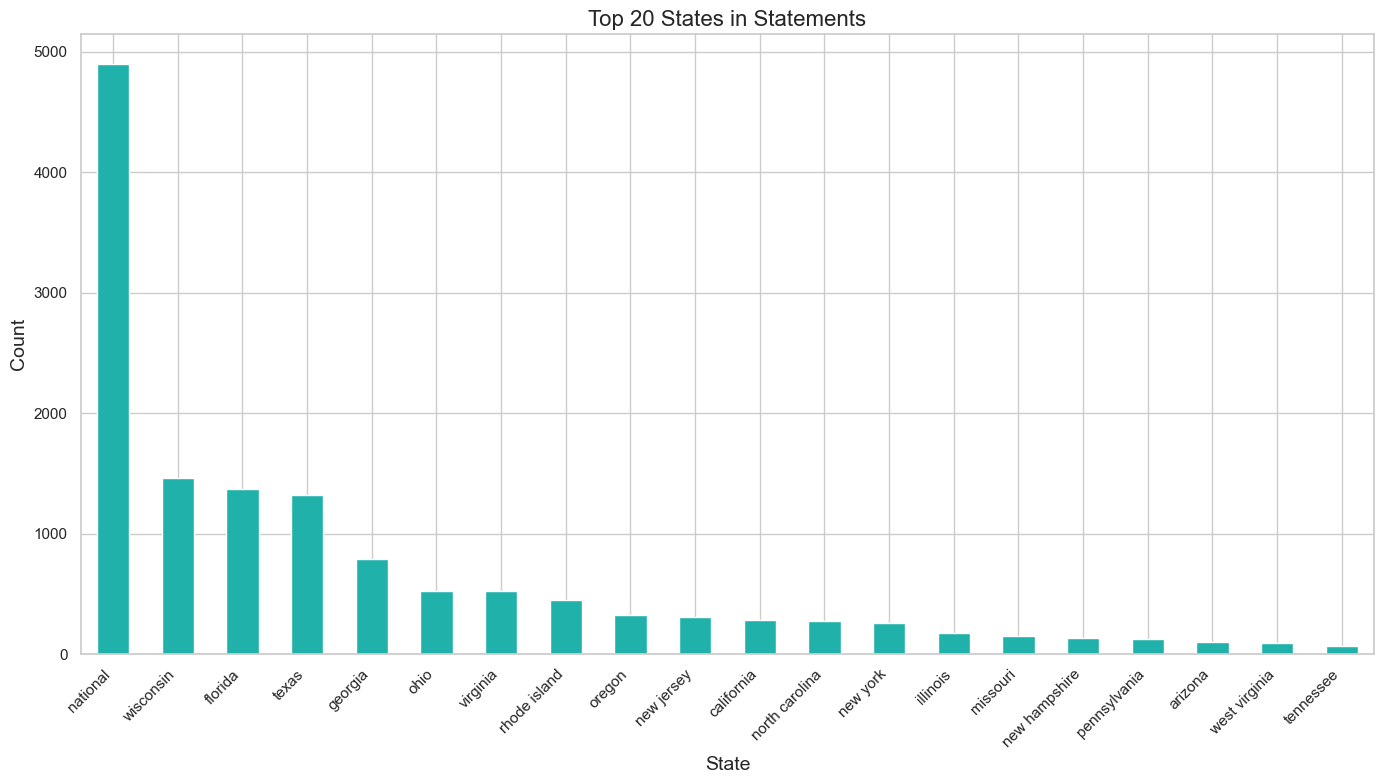

In [72]:
plt.figure(figsize=(14, 8))
state_counts.plot(kind='bar', color='lightseagreen')
plt.title('Top 20 States in Statements', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [73]:
# Truth distribution across top states
top_states = train_df['state_info'].value_counts().head(10).index
top_state_df = train_df[train_df['state_info'].isin(top_states)]

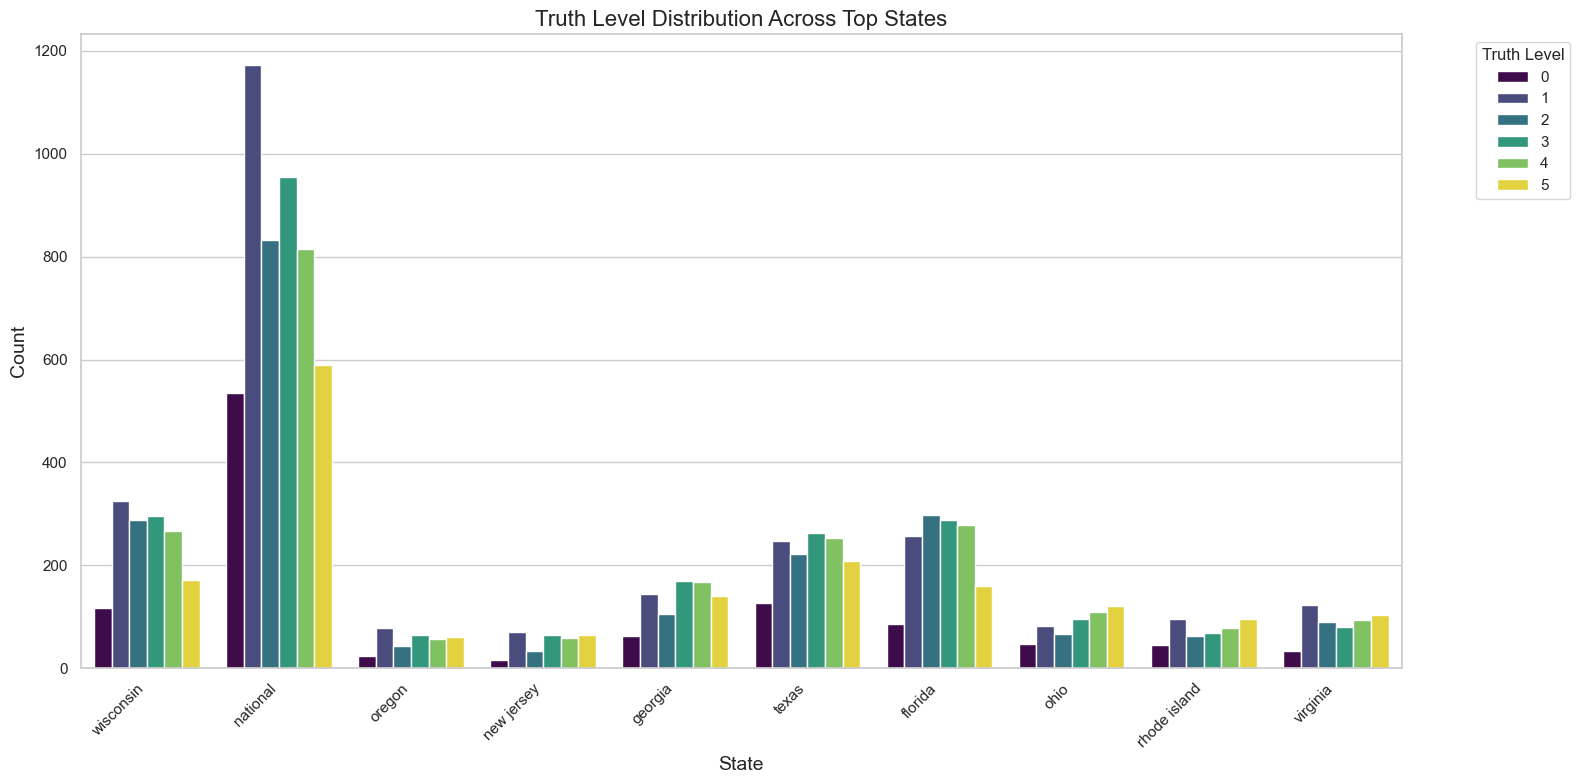

In [74]:
plt.figure(figsize=(16, 8))
sns.countplot(data=top_state_df, x='state_info', hue='label', palette='viridis')
plt.title('Truth Level Distribution Across Top States', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Truth Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
# Calculate average truth by state
state_truth = train_df.groupby('state_info')['label'].mean().sort_values()
state_counts = train_df['state_info'].value_counts()
states_with_counts = pd.DataFrame({
    'avg_truth': state_truth,
    'count': state_counts
})

In [76]:
# Filter states with at least 10 statements
filtered_states = states_with_counts[states_with_counts['count'] >= 10]
most_truthful_states = filtered_states['avg_truth'].sort_values(ascending=False).head(10)
least_truthful_states = filtered_states['avg_truth'].sort_values().head(10)

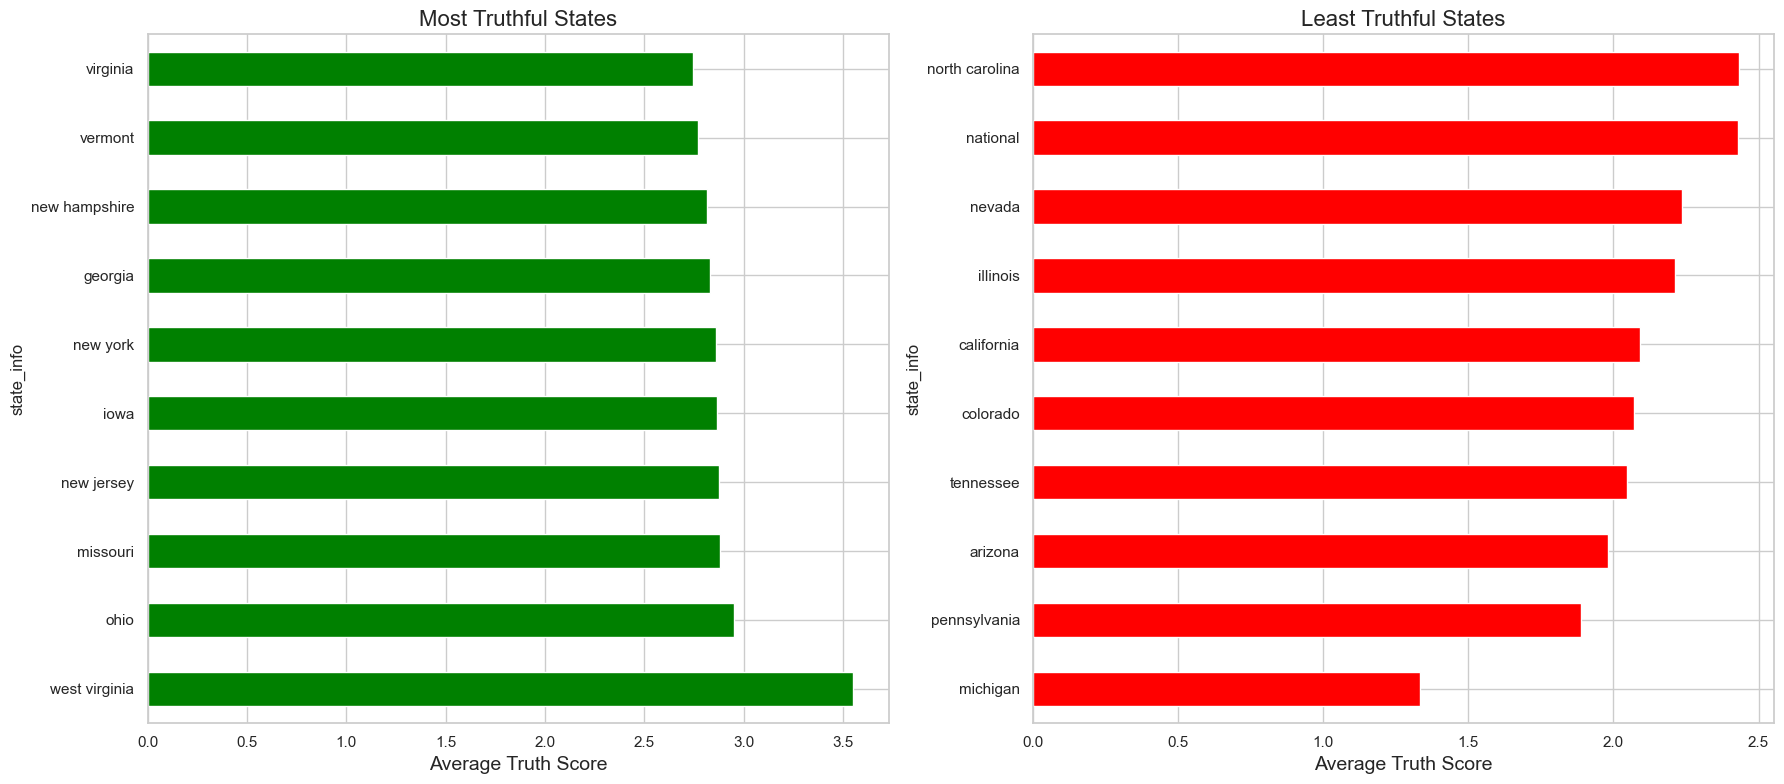

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
most_truthful_states.plot(kind='barh', ax=ax[0], color='green')
ax[0].set_title('Most Truthful States', fontsize=16)
ax[0].set_xlabel('Average Truth Score', fontsize=14)

least_truthful_states.plot(kind='barh', ax=ax[1], color='red')
ax[1].set_title('Least Truthful States', fontsize=16)
ax[1].set_xlabel('Average Truth Score', fontsize=14)

plt.tight_layout()
plt.show()

## Correlation Between Features

Let's examine the correlations between various numerical features.

In [78]:
# Select numerical columns for correlation analysis
num_cols = ['label', 'true_counts', 'mostly_true_counts', 'half_true_counts', 
            'mostly_false_counts', 'false_counts', 'pants_on_fire_counts', 'statement_length']

In [79]:
# Calculate correlation matrix
corr_matrix = train_df[num_cols].corr()

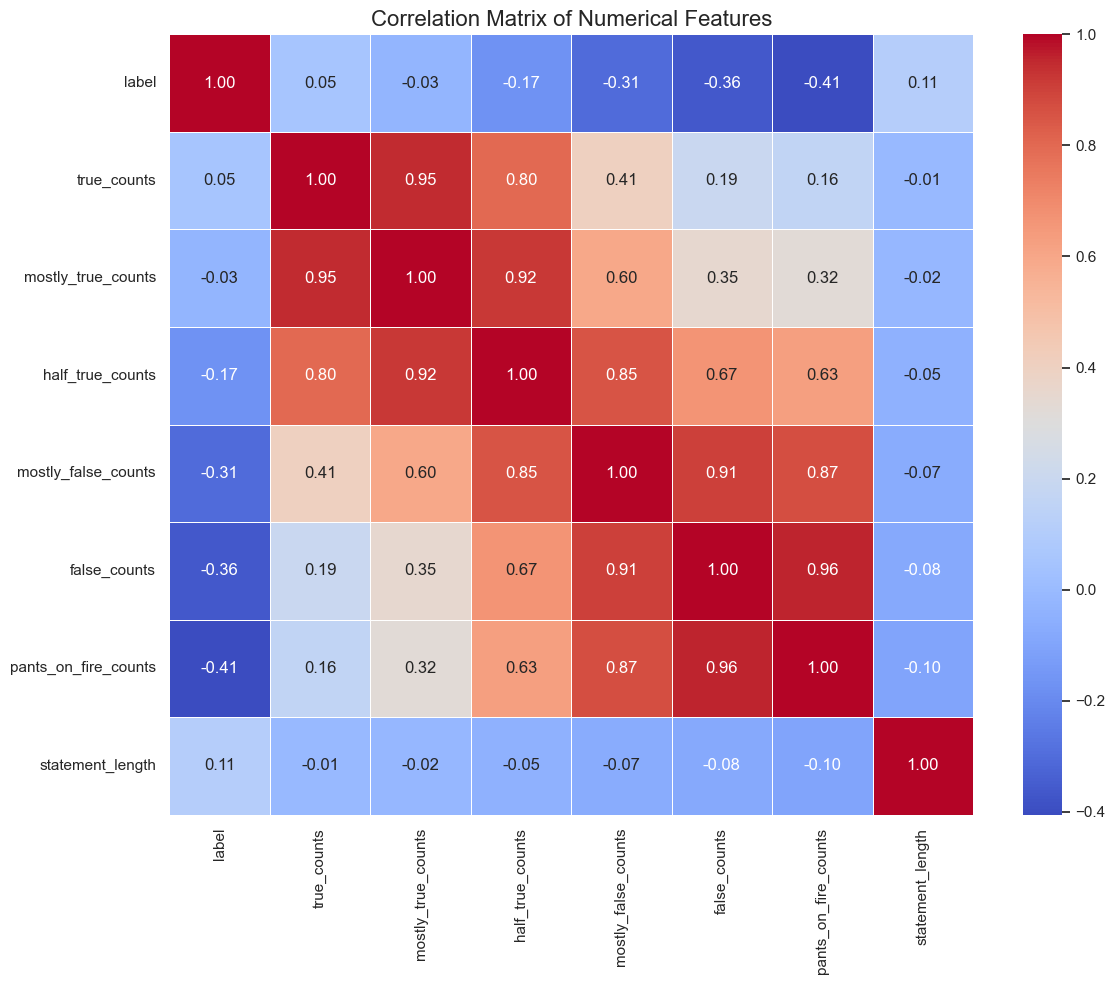

In [80]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## Feature Engineering Ideas

Let's create some features that might be useful for our ML model.

In [81]:
# Create a function to demonstrate feature engineering
def create_features(df):
    df_new = df.copy()
    
    # Statement length features
    df_new['statement_length'] = df_new['statement'].apply(lambda x: len(str(x).split()))
    df_new['statement_char_length'] = df_new['statement'].apply(lambda x: len(str(x)))
    df_new['avg_word_length'] = df_new['statement_char_length'] / df_new['statement_length']
    
    # Question mark and exclamation mark count
    df_new['question_count'] = df_new['statement'].apply(lambda x: str(x).count('?'))
    df_new['exclamation_count'] = df_new['statement'].apply(lambda x: str(x).count('!'))
    
    # Quotes count - might indicate citing sources
    df_new['quote_count'] = df_new['statement'].apply(lambda x: str(x).count('"') + str(x).count("'"))
    
    # Numbers count - might indicate use of statistics
    df_new['number_count'] = df_new['statement'].apply(lambda x: sum(c.isdigit() for c in str(x)))
    
    # Uppercase word count - might indicate emphasis
    df_new['uppercase_word_count'] = df_new['statement'].apply(
        lambda x: sum(1 for word in str(x).split() if word.isupper() and len(word) > 1)
    )
    
    # Create day of week feature from date
    if 'date' in df_new.columns and pd.api.types.is_datetime64_any_dtype(df_new['date']):
        df_new['day_of_week'] = df_new['date'].dt.dayofweek
    
    # Total count of previous statements by the same speaker
    speaker_counts = {}
    df_new['speaker_prior_statements'] = 0
    
    for idx, row in df_new.iterrows():
        speaker = row['speaker']
        if speaker in speaker_counts:
            df_new.at[idx, 'speaker_prior_statements'] = speaker_counts[speaker]
            speaker_counts[speaker] += 1
        else:
            speaker_counts[speaker] = 1
    
    return df_new

In [82]:
# Create features for demonstration
train_df_with_features = create_features(train_df)

In [83]:
# Display the new features
new_features = ['statement_length', 'statement_char_length', 'avg_word_length', 
                'question_count', 'exclamation_count', 'quote_count', 
                'number_count', 'uppercase_word_count', 'speaker_prior_statements']

train_df_with_features[['statement'] + new_features].head()

,statement,statement_length,statement_char_length,avg_word_length,question_count,exclamation_count,quote_count,number_count,uppercase_word_count,speaker_prior_statements
0,"90 percent of Americans ""support universal bac...",11,80,7.272727,0,0,2,2,0,0
1,Last year was one of the deadliest years ever ...,13,75,5.769231,0,0,0,0,0,0
2,"Bernie Sanders's plan is ""to raise your taxes ...",11,60,5.454545,0,0,2,2,0,0
3,Voter ID is supported by an overwhelming major...,21,122,5.809524,0,0,0,0,1,0
4,"Says Barack Obama ""robbed Medicare (of) $716 b...",13,78,6.000000,0,0,1,3,0,0


## Class Imbalance Analysis

Let's check if there's any class imbalance in our dataset.

In [84]:
# Plot class distribution with percentages
label_counts = train_df['label'].value_counts().sort_index()
total = len(train_df)
label_percentages = label_counts / total * 100

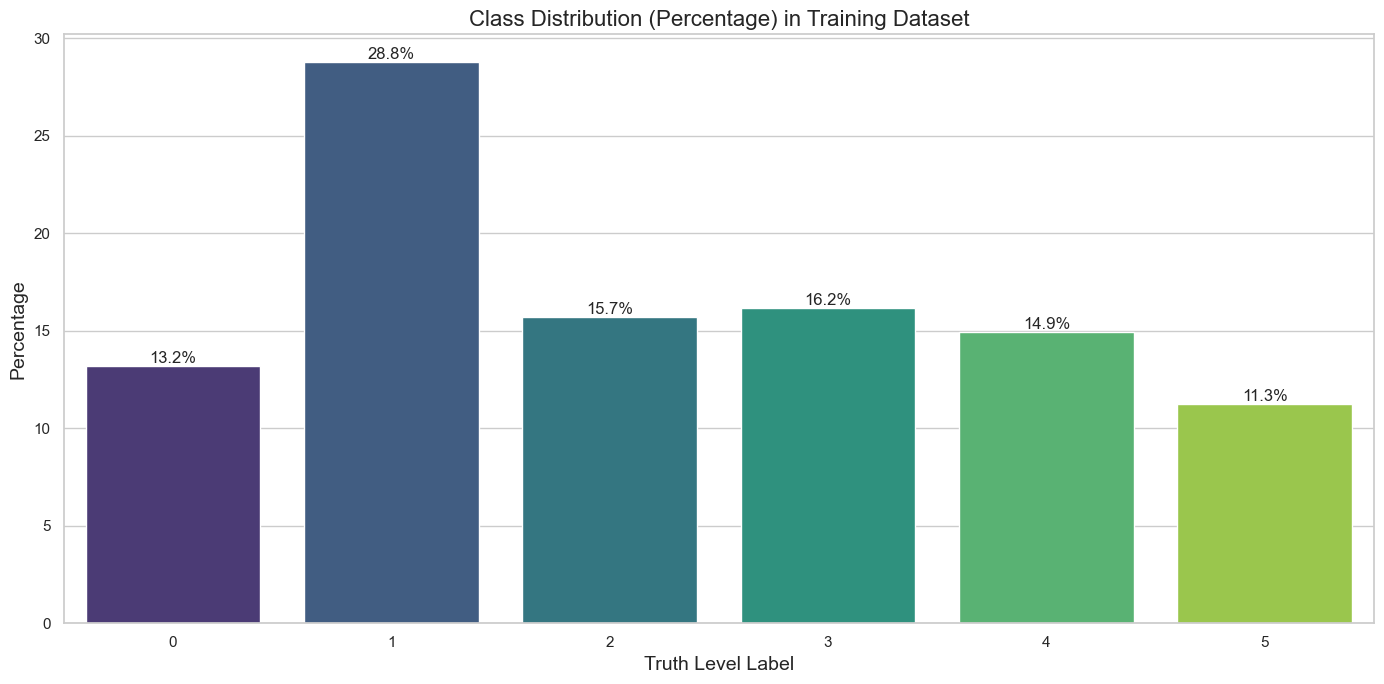

In [86]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=label_counts.index, y=label_percentages, palette='viridis')
plt.title('Class Distribution (Percentage) in Training Dataset', fontsize=16)
plt.xlabel('Truth Level Label', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Add percentage labels on top of bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [87]:
# Calculate imbalance ratio
max_class = label_counts.max()
min_class = label_counts.min()
imbalance_ratio = max_class / min_class

In [88]:
print(f"Class imbalance ratio (largest/smallest): {imbalance_ratio:.2f}")
print(f"Majority class: {label_counts.idxmax()} ({label_mapping.get(label_counts.idxmax(), 'unknown')})")
print(f"Minority class: {label_counts.idxmin()} ({label_mapping.get(label_counts.idxmin(), 'unknown')})")

Class imbalance ratio (largest/smallest): 2.56
Majority class: 1 (false)
Minority class: 5 (true)


## Summary of EDA Findings and Modeling Recommendations

### Key Insights from the Analysis:

1. **Class Imbalance**: The dataset shows moderate class imbalance with "false" (28.8%) having more than twice the representation of "true" (11.3%) statements. This imbalance should be addressed during model training through class weights or sampling techniques.

2. **Feature Importance**: 
   - **Text Content**: Statement content shows distinct linguistic patterns across truth levels
   - **Contextual Features**: Speaker, subject, and context all show strong correlations with truthfulness
   - **Statement Length**: Slight positive correlation (0.11) with truthfulness - longer statements tend to be marginally more truthful

3. **Geographic Patterns**: Significant variations in truthfulness across states (as shown in Image 1), though this may reflect regional political discourse rather than inherent geographic differences.

4. **Temporal Trends**: Recent years show increased fact-checking activity, particularly for false claims, suggesting evolving patterns of misinformation.

### Modeling Recommendations:

1. **Selected Features**: Keep statement, label, subject, speaker, and context columns for the model.

2. **Input Structure**: Combine text columns using special tokens:
   ```
   {statement} [SEP] Subject: {subject} [SEP] Speaker: {speaker} [SEP] Context: {context}
   ```

3. **Evaluation Strategy**: 
   - Use stratified sampling to maintain class distribution
   - Consider both accuracy and macro-F1 score to account for class imbalance
   - Analyze performance across different speakers, subjects, and contexts

4. **Implementation Approach**:
   - Start with a baseline model using only the statement text
   - Add contextual features incrementally to measure their impact
   - Implement class weights to address the imbalance (1:2.56 ratio between true and false classes)

This EDA has provided valuable insights into patterns of misinformation and truthfulness that should guide the model development process.